# Bay Wheels Bike Renting Analysis
## by Sahand Niasti

## 1- Preliminary Wrangling

> goforbike site have provided us the bike rental data for each month since 2017. Here, i decided to make a comparison between the first three month of 2019 and 2020 and see whether any difference in patterns of behavior in these two similar time period over a year. there were around 600,000 records in 2019 and 900,000 records in 2020.

![image](https://images.ctfassets.net/q8mvene1wzq4/6dGh9eUKHYux2Yw8SLdGg1/58ba839dcfa17571a284985fd4894080/Bay_Wheels_Black_sm.png?w=1500)

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import geopy.distance
from sklearn.cluster import KMeans
%matplotlib inline

## 1-1- Data Gathering

In [35]:
#define filenames to download
year_data = [[x,"fordgobike"] for x in range(201901, 201904)] + [[x,"baywheels"] for x in range(202001, 202004)]

#loop over years
for date, name in year_data:
       
    #url structure
    url = f"https://s3.amazonaws.com/baywheels-data/{date}-{name}-tripdata.csv.zip"
    
    #get response
    response = requests.get(url)
   
    #save file
    with open(f"./Data/{date}-{name}-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)

In [38]:
#extract zip files
for date, name in year_data:
    with zipfile.ZipFile(f"./Data/{date}-{name}-tripdata.csv.zip",'r') as zip_ref:
                zip_ref.extractall("./Data")

In [39]:
#append tripdata in 2019
result_19 = pd.read_csv("./Data/201901-fordgobike-tripdata.csv")
result_19 = result_19.append(pd.read_csv("./Data/201902-fordgobike-tripdata.csv"))
result_19 = result_19.append(pd.read_csv("./Data/201903-fordgobike-tripdata.csv"))
# Save file
result_19.to_csv("baywheels_2019_tripdata.csv", index = False)

print("2019 is done")

#append tripdata in 2019
result_20 = pd.read_csv("./Data/202001-baywheels-tripdata.csv")
result_20 = result_20.append(pd.read_csv("./Data/202002-baywheels-tripdata.csv"))
result_20 = result_20.append(pd.read_csv("./Data/202003-baywheels-tripdata.csv"))
# Save file
result_20.to_csv("baywheels_2020_tripdata.csv", index = False)

print("2020 is done")

2019 is done


C:\Users\Sahand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2020 is done


In [40]:
#import dataset in 2019
df_19 = pd.read_csv("baywheels_2019_tripdata.csv")
print(df_19.shape)
df_19.head()

(631793, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80825,2019-01-31 17:57:44.6130,2019-02-01 16:24:49.8640,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No
1,65900,2019-01-31 20:58:33.8860,2019-02-01 15:16:54.1730,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No
2,62633,2019-01-31 18:06:52.9240,2019-02-01 11:30:46.5300,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No
3,44680,2019-01-31 19:46:09.7190,2019-02-01 08:10:50.3180,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No
4,60709,2019-01-31 14:19:01.5410,2019-02-01 07:10:51.0650,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No


In [41]:
#import dataset in 2020
df_20 = pd.read_csv('baywheels_2020_tripdata.csv')
print(df_20.shape)
df_20.head()

C:\Users\Sahand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(905007, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,83118,2020-01-31 15:23:47.7330,2020-02-01 14:29:06.2630,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,-122.433537,13052,Customer,NaN
1,68239,2020-01-31 15:40:31.6160,2020-02-01 10:37:51.0000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,-122.415442,12235,Subscriber,NaN
2,55407,2020-01-31 17:48:16.6350,2020-02-01 09:11:44.3170,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,12822,Customer,NaN
3,54929,2020-01-31 17:53:03.4130,2020-02-01 09:08:32.6340,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,11705,Customer,NaN
4,55700,2020-01-31 17:12:33.4600,2020-02-01 08:40:53.6460,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,3673,Customer,NaN


## 1-2- Data Assessment

## 1-2-1- df_19

In [43]:
df_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631793 entries, 0 to 631792
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             631793 non-null  int64  
 1   start_time               631793 non-null  object 
 2   end_time                 631793 non-null  object 
 3   start_station_id         631127 non-null  float64
 4   start_station_name       631127 non-null  object 
 5   start_station_latitude   631793 non-null  float64
 6   start_station_longitude  631793 non-null  float64
 7   end_station_id           631127 non-null  float64
 8   end_station_name         631127 non-null  object 
 9   end_station_latitude     631793 non-null  float64
 10  end_station_longitude    631793 non-null  float64
 11  bike_id                  631793 non-null  int64  
 12  user_type                631793 non-null  object 
 13  bike_share_for_all_trip  631793 non-null  object 
dtypes: f

In [42]:
df_19.describe(include = "all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
count,631793.000000,631793,631793,631127.000000,631127,631793.000000,631793.000000,631127.000000,631127,631793.000000,631793.000000,631793.000000,631793,631793
unique,NaN,631748,631747,NaN,347,NaN,NaN,NaN,347,NaN,NaN,NaN,2,2
top,NaN,2019-01-31 08:36:43.4040,2019-03-12 08:18:39.2660,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,No
freq,NaN,2,2,NaN,13064,NaN,NaN,NaN,17240,NaN,NaN,NaN,551599,576023
mean,766.822687,NaN,NaN,137.963728,NaN,37.772118,-122.355651,136.246602,NaN,37.772284,-122.355268,4517.932498,NaN,NaN
std,1871.273432,NaN,NaN,112.691312,NaN,0.096126,0.113949,112.575145,NaN,0.096050,0.113585,1687.462019,NaN,NaN
min,61.000000,NaN,NaN,3.000000,NaN,37.315158,-122.453704,3.000000,NaN,37.315158,-122.453704,11.000000,NaN,NaN
25%,332.000000,NaN,NaN,44.000000,NaN,37.770407,-122.413004,43.000000,NaN,37.770407,-122.411738,3795.000000,NaN,NaN
50%,529.000000,NaN,NaN,102.000000,NaN,37.780955,-122.398525,100.000000,NaN,37.781010,-122.398436,4991.000000,NaN,NaN
75%,827.000000,NaN,NaN,236.000000,NaN,37.797280,-122.291415,228.000000,NaN,37.797280,-122.291415,5552.000000,NaN,NaN


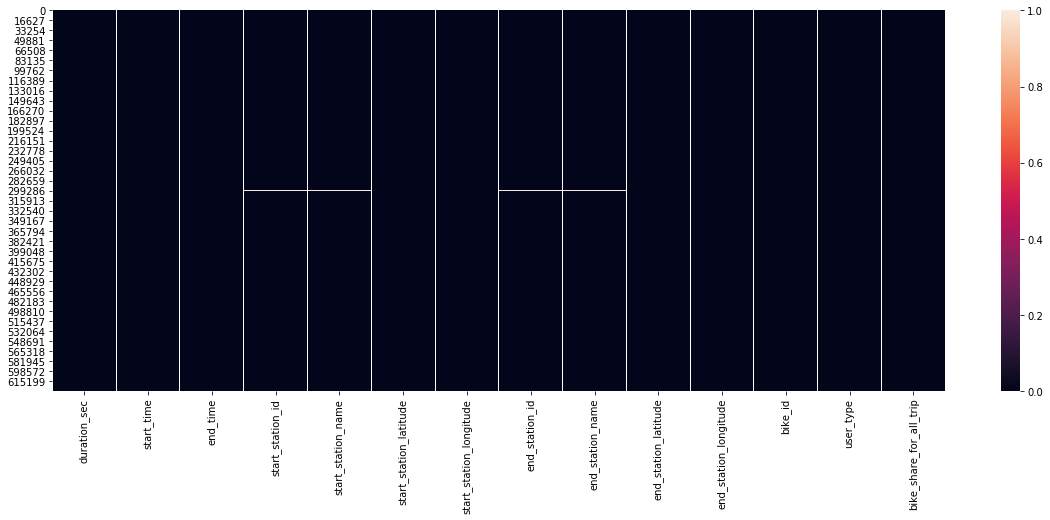

In [46]:
# heatmap
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_19.isnull(), vmin=0, vmax = 1)

As we can see, some data is missed in start and end station id and name. this part requires more investigation

In [47]:
df_19.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           666
start_station_name         666
start_station_latitude       0
start_station_longitude      0
end_station_id             666
end_station_name           666
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [48]:

df_19[df_19.start_station_id.isnull()].start_station_latitude.value_counts()

37.41    326
37.40    239
37.42     53
37.39     40
37.38      8
Name: start_station_latitude, dtype: int64

In [54]:
df_19[df_19.start_station_id.isnull()].start_station_longitude.value_counts()

-121.94    199
-121.93    196
-121.96    130
-121.95    106
-121.92     31
-121.98      2
-121.91      1
-121.97      1
Name: start_station_longitude, dtype: int64

we can see that lost data is concentrated mostly in a specific area. let's see where it is.

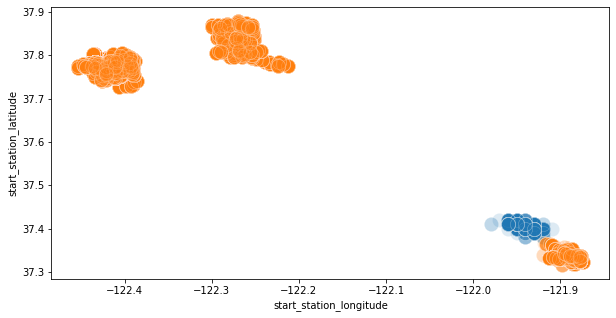

In [58]:
# creating a plot to show the concentration of missed (blue) and available (orange) data
axes, figure = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df_19[df_19.start_station_id.isnull()], x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
sns.scatterplot(data = df_19.dropna(subset=["start_station_id"]), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)


## 1-2-2- df_20

In [64]:
df_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905007 entries, 0 to 905006
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             905007 non-null  int64  
 1   start_time               905007 non-null  object 
 2   end_time                 905007 non-null  object 
 3   start_station_id         418705 non-null  float64
 4   start_station_name       419938 non-null  object 
 5   start_station_latitude   905007 non-null  float64
 6   start_station_longitude  905007 non-null  float64
 7   end_station_id           419225 non-null  float64
 8   end_station_name         420499 non-null  object 
 9   end_station_latitude     905007 non-null  float64
 10  end_station_longitude    905007 non-null  float64
 11  bike_id                  905007 non-null  int64  
 12  user_type                905007 non-null  object 
 13  rental_access_method     617858 non-null  object 
dtypes: f

In [49]:
df_20.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id           486302
start_station_name         485069
start_station_latitude          0
start_station_longitude         0
end_station_id             485782
end_station_name           484508
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
rental_access_method       287149
dtype: int64

in 2019, just 666 out of 600,000 records were missed. So, it was possible to remove them, but here in half of our data, we do not have any information about station id and station names. because of that, idecided not to delete any row and continue analyzing with missed data.

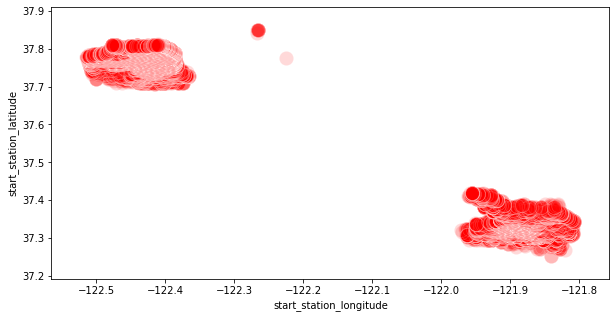

In [132]:
#visualize coordination of missing data
axes, figure = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df_20[df_20.start_station_id.isnull()], x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200,color = 'red')


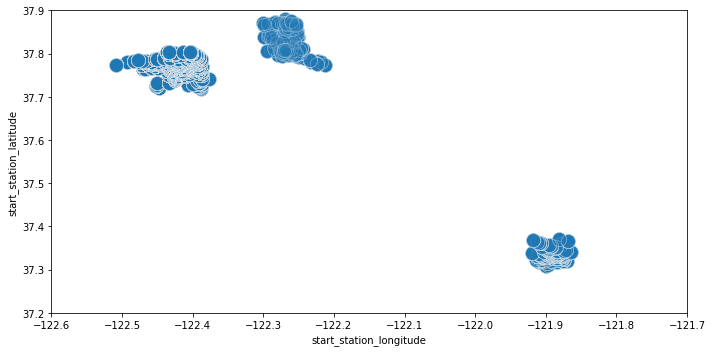

In [131]:
#visualizing available data
axes, figure = plt.subplots(figsize = (10,5))
sns.scatterplot(data = df_20.dropna(subset=["start_station_id"]), x = "start_station_longitude", y = "start_station_latitude", alpha = 0.15, s = 200)
plt.xlim(-122.6,-121.7)
plt.ylim(37.2,37.9)
plt.tight_layout()

In [65]:
df_20.describe(include = "all")

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
count,905007.000000,905007,905007,418705.000000,419938,905007.000000,905007.000000,419225.000000,420499,905007.000000,905007.000000,905007.000000,905007,617858
unique,NaN,848251,847915,NaN,453,NaN,NaN,NaN,452,NaN,NaN,NaN,2,2
top,NaN,2020-03-01 16:23:39,2020-03-01 14:05:08,NaN,Market St at 10th St,NaN,NaN,NaN,San Francisco Caltrain (Townsend St at 4th St),NaN,NaN,NaN,Subscriber,app
freq,NaN,8,8,NaN,7676,NaN,NaN,NaN,13580,NaN,NaN,NaN,544696,570471
mean,806.783430,NaN,NaN,175.490438,NaN,37.747956,-122.356863,168.499295,NaN,37.747504,-122.354743,345257.165427,NaN,NaN
std,1651.803494,NaN,NaN,146.361852,NaN,0.229245,0.646076,145.618964,NaN,0.270214,0.795225,305503.123238,NaN,NaN
min,60.000000,NaN,NaN,3.000000,NaN,0.000000,-122.514230,3.000000,NaN,0.000000,-122.575763,12.000000,NaN,NaN
25%,370.000000,NaN,NaN,56.000000,NaN,37.765281,-122.420664,44.000000,NaN,37.765464,-122.419957,12114.000000,NaN,NaN
50%,595.000000,NaN,NaN,123.000000,NaN,37.776972,-122.404635,116.000000,NaN,37.777062,-122.403681,326439.000000,NaN,NaN
75%,932.000000,NaN,NaN,275.000000,NaN,37.789914,-122.392741,265.000000,NaN,37.790229,-122.392741,557460.000000,NaN,NaN


In [73]:
# which riders have rented a bike more than 80,000 seconds (22 hours)
df_20[df_20.duration_sec > 80000].sort_values(by='duration_sec',ascending = False)['duration_sec'].head()

121168    811077
347472     86317
386984     86239
49926      86221
63677      85994
Name: duration_sec, dtype: int64

In [74]:
# which latitudes or longitudes are missing
df_20[df_20.start_station_longitude == 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
110108,794,2020-01-28 20:50:28,2020-01-28 21:03:43,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734992,-122.390912,501987,Subscriber,app
110109,734,2020-01-22 20:49:20,2020-01-22 21:01:34,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735049,-122.391287,557920,Subscriber,app
110110,819,2020-01-29 20:47:29,2020-01-29 21:01:09,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734907,-122.390933,440549,Subscriber,app
110111,788,2020-01-23 20:48:55,2020-01-23 21:02:04,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735037,-122.391021,931945,Subscriber,app
110112,943,2020-01-31 18:05:13,2020-01-31 18:20:56,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735051,-122.391249,433223,Subscriber,app
110113,1098,2020-01-24 20:25:24,2020-01-24 20:43:42,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734996,-122.391248,112771,Subscriber,app
110114,130,2020-01-21 20:39:57,2020-01-21 20:42:08,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.765149,-122.396379,879169,Subscriber,app
110115,1081,2020-01-27 20:21:14,2020-01-27 20:39:15,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735047,-122.391207,261501,Subscriber,app
410365,816,2020-02-19 21:16:22,2020-02-19 21:29:58,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735151,-122.391321,905041,Subscriber,app
410366,801,2020-02-04 20:45:51,2020-02-04 20:59:13,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734967,-122.390932,366709,Subscriber,app


there seems to be a problem with the station id 449. let's investigate more.

In [75]:
# station id number 449
df_20[df_20.start_station_id == 449]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
110108,794,2020-01-28 20:50:28,2020-01-28 21:03:43,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734992,-122.390912,501987,Subscriber,app
110109,734,2020-01-22 20:49:20,2020-01-22 21:01:34,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735049,-122.391287,557920,Subscriber,app
110110,819,2020-01-29 20:47:29,2020-01-29 21:01:09,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734907,-122.390933,440549,Subscriber,app
110111,788,2020-01-23 20:48:55,2020-01-23 21:02:04,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735037,-122.391021,931945,Subscriber,app
110112,943,2020-01-31 18:05:13,2020-01-31 18:20:56,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735051,-122.391249,433223,Subscriber,app
110113,1098,2020-01-24 20:25:24,2020-01-24 20:43:42,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734996,-122.391248,112771,Subscriber,app
110114,130,2020-01-21 20:39:57,2020-01-21 20:42:08,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.765149,-122.396379,879169,Subscriber,app
110115,1081,2020-01-27 20:21:14,2020-01-27 20:39:15,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735047,-122.391207,261501,Subscriber,app
410365,816,2020-02-19 21:16:22,2020-02-19 21:29:58,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.735151,-122.391321,905041,Subscriber,app
410366,801,2020-02-04 20:45:51,2020-02-04 20:59:13,449.0,16th Depot Bike Fleet Station,0.0,0.0,NaN,NaN,37.734967,-122.390932,366709,Subscriber,app


it seems that this station did not record any latitude or longitude

## 1-2-3- Assessing Summory 

### df_19

- there are missing values in start and end station id and name (these stations are mostly concentrated in a specific area)
- date format in start time, end time and station ids'  is not correct
- location of coordinates are concentrated in three area,and need to be investigated
- last column(bike_share_for_all_trip) is useless
- no tidiness issue has found

### df_20

- around half of station ids and station names are missed (which are located mostly in 2 area and seems to be a systematic error).so, we will leave it alone
- there is a ride with 222 hours which need to be omitted
- 16th Depot Bike Fleet Station did not record any start coordination
- date format in start time, end time and station ids' is not correct
- no tidiness issue has found

## 1-3- Data Cleaning

## 1-3-1- df_19


In [79]:
df_19_clean = df_19.copy()

#### Issue #1

##### Define:
    
    there are only 666 rows out of around 600,000 rows without station id and name. so, they will be deleted
    
##### Code:


In [80]:
df_19_clean.dropna(subset = ["start_station_id"], inplace = True)

##### Test:

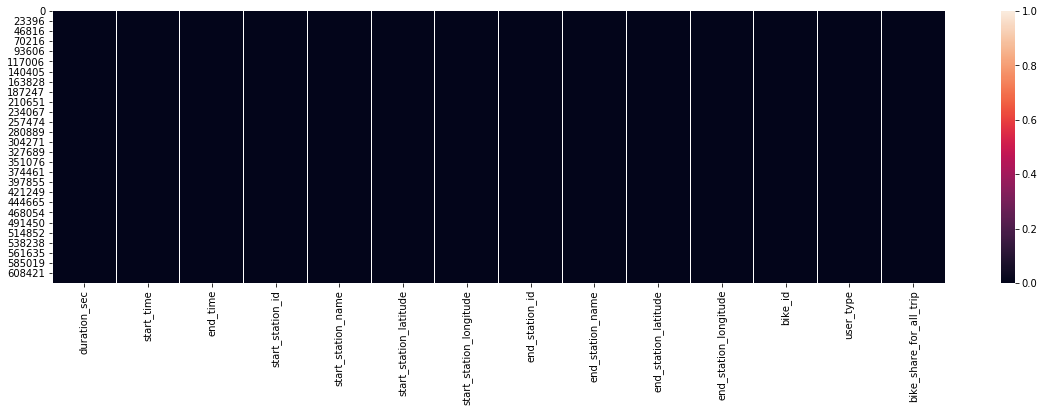

In [82]:
# heatmap
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.heatmap(df_19_clean.isnull(), vmin=0, vmax = 1)

#### Issue #2

##### Define:
    
    - the columns 'start_time' and 'end_time' are not datetime type
    - the columns 'start_station_id', 'end_station_id', and 'bike_id' are not object type
    
##### Code:


In [84]:

for col in ["start_time", "end_time"]:
    df_19_clean[col] = pd.to_datetime(df_19_clean[col])
    
for col in ["start_station_id", "end_station_id"]:
    df_19_clean[col] = df_19_clean[col].astype("int")

for col in ["start_station_id", "end_station_id", "bike_id"]:
    df_19_clean[col] = df_19_clean[col].astype("str")

##### Test:

In [85]:
df_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631127 entries, 0 to 631792
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             631127 non-null  int64         
 1   start_time               631127 non-null  datetime64[ns]
 2   end_time                 631127 non-null  datetime64[ns]
 3   start_station_id         631127 non-null  object        
 4   start_station_name       631127 non-null  object        
 5   start_station_latitude   631127 non-null  float64       
 6   start_station_longitude  631127 non-null  float64       
 7   end_station_id           631127 non-null  object        
 8   end_station_name         631127 non-null  object        
 9   end_station_latitude     631127 non-null  float64       
 10  end_station_longitude    631127 non-null  float64       
 11  bike_id                  631127 non-null  object        
 12  user_type       

#### Issue #3

##### Define:
    
    - the columns 'bike_share_for_all_trip' is useless and should be dropped.

    
##### Code:

In [86]:
df_19_clean.drop('bike_share_for_all_trip', axis = 1,inplace=True)

##### Test: 

In [87]:
df_19_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

## 1-3-2- df_20

In [104]:
df_20_clean = df_20.copy()

#### Issue #1

##### Define:
    
    - drop an outlier with 222 hours ride
    - drop stations with no coordinates (coordinates of zero)

    
##### Code:

In [105]:
df_20_clean.drop(121168, inplace = True)
df_20_clean.drop(df_20_clean[df_20_clean.start_station_longitude == 0].index,inplace = True)

##### Test:

In [96]:
df_20_clean[df_20_clean.duration_sec > 800000]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method


In [106]:
df_20_clean[df_20_clean.start_station_longitude == 0]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method


#### Issue #2

##### Define:
    
    - the columns 'start_time' and 'end_time' are not datetime type
    - the columns 'start_station_id', 'end_station_id', and 'bike_id' are not object type
    
##### Code:


In [108]:

for col in ["start_time", "end_time"]:
    df_20_clean[col] = pd.to_datetime(df_20_clean[col])
    
for col in [ "bike_id"]:
    df_20_clean[col] = df_20_clean[col].astype("str")

##### Test:

In [109]:
df_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904982 entries, 0 to 905006
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             904982 non-null  int64         
 1   start_time               904982 non-null  datetime64[ns]
 2   end_time                 904982 non-null  datetime64[ns]
 3   start_station_id         418681 non-null  float64       
 4   start_station_name       419914 non-null  object        
 5   start_station_latitude   904982 non-null  float64       
 6   start_station_longitude  904982 non-null  float64       
 7   end_station_id           419225 non-null  float64       
 8   end_station_name         420499 non-null  object        
 9   end_station_latitude     904982 non-null  float64       
 10  end_station_longitude    904982 non-null  float64       
 11  bike_id                  904982 non-null  object        
 12  user_type       

## 1-3-3- Feature Engineering

In this section I'll be using the knowledge acquired by inspecting the dataframes to create new features, aiming to facilitate the exploration.

In [113]:
# Creating month column
df_19_clean['month'] = df_19_clean.start_time.dt.month.map({1:'January', 2:'February', 3:'March'})
df_20_clean['month'] = df_20_clean.start_time.dt.month.map({1:'January', 2:'February', 3:'March'})

# Creating monthday column
df_19_clean['monthday'] = df_19_clean.start_time.dt.day
df_20_clean['monthday'] = df_20_clean.start_time.dt.day

# Creating weekday column
df_19_clean['weekday'] = df_19_clean.start_time.dt.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                          3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df_20_clean['weekday'] = df_20_clean.start_time.dt.weekday.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                                                          3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
# Creating started_hour column
df_19_clean['started_hour'] = df_19_clean.start_time.dt.hour
df_20_clean['started_hour'] = df_20_clean.start_time.dt.hour

# Creating ended_hour column
df_19_clean['ended_hour'] = df_19_clean.end_time.dt.hour
df_20_clean['ended_hour'] = df_20_clean.end_time.dt.hour

df_19_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,January,31,Thursday,17,16
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,January,31,Thursday,20,15
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer,January,31,Thursday,18,11
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,January,31,Thursday,19,8
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,January,31,Thursday,14,7


In [151]:
#https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude/43211266#43211266

def calculate_coord_dist(col):
    coords_1 = (col[0], col[1])
    coords_2 = (col[2], col[3])
    
    return geopy.distance.distance(coords_1, coords_2).m

In [ ]:
df_19_clean['distance_in_m'] = df_19_clean[["end_station_latitude", "end_station_longitude", "start_station_latitude", "start_station_longitude"]].apply(calculate_coord_dist, axis = 1)


In [153]:
df_19_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour,trip_time,label,distance_in_m
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,...,4861,Subscriber,January,31,Thursday,17,16,1347.1,San Francisco,5307.083821
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,...,5506,Subscriber,January,31,Thursday,20,15,1098.3,San José,3853.745028
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,...,2717,Customer,January,31,Thursday,18,11,1043.9,San Francisco,3286.340272
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,...,4557,Customer,January,31,Thursday,19,8,744.7,San José,1000.226353
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,...,2100,Customer,January,31,Thursday,14,7,1011.8,San José,952.985852


In [154]:
# creating a column which shows the distance between stations and a hypothetical view on the length of the rides
df_20_clean['distance_in_m'] = df_20_clean[["end_station_latitude", "end_station_longitude", "start_station_latitude", "start_station_longitude"]].apply(calculate_coord_dist, axis = 1)
df_20_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,rental_access_method,month,monthday,weekday,started_hour,ended_hour,trip_time,label,distance_in_m
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,37.804272,-122.433537,400.0,Buchanan St at North Point St,37.804272,...,Customer,NaN,January,31,Friday,15,14,1385.3,2,0.000000
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,37.767037,-122.415442,99.0,Folsom St at 15th St,37.767037,...,Subscriber,NaN,January,31,Friday,15,10,1137.3,2,0.000000
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,...,Customer,NaN,January,31,Friday,17,9,923.4,0,0.000000
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,197.0,El Embarcadero at Grand Ave,37.808848,...,Customer,NaN,January,31,Friday,17,9,915.5,0,0.000000
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,37.796389,-122.394586,371.0,Lombard St at Columbus Ave,37.802746,...,Customer,NaN,January,31,Friday,17,8,928.3,2,1815.454679


Before we start visualizing and Exploring data, we have assessed that some additional information out of the data can be extracted to improve the insights. We saw, that these datapoints can be separated in three clusters. Since these clusters are really obvious, we can classify them really efficient using the K-Means Clustering algorithm.

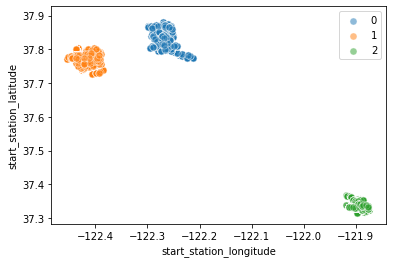

In [139]:
#https://datatofish.com/k-means-clustering-python/
#clustering coordination of stations into three main area
kmeans = KMeans(n_clusters=3).fit(df_19_clean[['start_station_latitude','start_station_longitude']])

df_19_clean["label"] = kmeans.labels_

for x in set(list(df_19_clean.label)):
    
    df_plot_cluster = df_19_clean.query(f"label == {x}")

    sns.scatterplot(df_plot_cluster.start_station_longitude, df_plot_cluster.start_station_latitude, s=50, alpha=0.5, label = x);

plt.legend();

In [146]:
df_19_clean['label'] = df_19_clean['label'].map({0: "San Francisco", 1: "San José", 2: "East Bay"})
df_19_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour,trip_time,label
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,January,31,Thursday,17,16,1347.1,San Francisco
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,January,31,Thursday,20,15,1098.3,San José
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer,January,31,Thursday,18,11,1043.9,San Francisco
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,January,31,Thursday,19,8,744.7,San José
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,January,31,Thursday,14,7,1011.8,San José


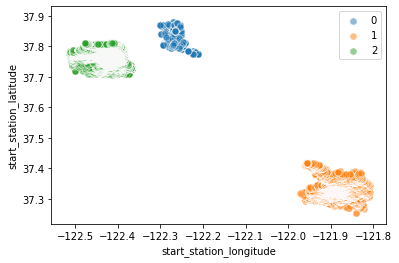

In [140]:
#clustering coordination of stations into three main area
kmeans = KMeans(n_clusters=3).fit(df_20_clean[['start_station_latitude','start_station_longitude']])

df_20_clean["label"] = kmeans.labels_

for x in set(list(df_20_clean.label)):
    
    df_plot_cluster = df_20_clean.query(f"label == {x}")

    sns.scatterplot(df_plot_cluster.start_station_longitude, df_plot_cluster.start_station_latitude, s=50, alpha=0.5, label = x);

plt.legend();

In [155]:
df_20_clean['label'] = df_20_clean['label'].map({0: "San Francisco", 1: "San José", 2: "East Bay"})
df_19_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour,trip_time,label,distance_in_m
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,...,4861,Subscriber,January,31,Thursday,17,16,1347.1,San Francisco,5307.083821
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,...,5506,Subscriber,January,31,Thursday,20,15,1098.3,San José,3853.745028
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,...,2717,Customer,January,31,Thursday,18,11,1043.9,San Francisco,3286.340272
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,...,4557,Customer,January,31,Thursday,19,8,744.7,San José,1000.226353
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,...,2100,Customer,January,31,Thursday,14,7,1011.8,San José,952.985852


![image]([https://i.ibb.co/vVkB9Xw/stations-kepler.png)

In [163]:
df_19_clean.to_csv('2019-clean-tripdata.csv',index = False)
df_20_clean.to_csv('2020-clean-tripdata.csv',index = False)

# 2- Exploratory Data Analysis and Visualization

## 2-1- Descriptive Statistics

In [5]:
df_2019 = pd.read_csv('2019-clean-tripdata.csv')
df_2020 = pd.read_csv('2020-clean-tripdata.csv')

C:\Users\Sahand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
df_2019.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,monthday,weekday,started_hour,ended_hour,label,distance_in_m
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,January,31,Thursday,17,16,San Francisco,5307.08
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,134,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,January,31,Thursday,20,15,San José,3853.75
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245,Downtown Berkeley BART,37.870139,-122.268422,157,65th St at Hollis St,37.846784,-122.291376,2717,Customer,January,31,Thursday,18,11,San Francisco,3286.34
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85,Church St at Duboce Ave,37.770083,-122.429156,53,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,January,31,Thursday,19,8,San José,1000.23
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16,Steuart St at Market St,37.794130,-122.394430,28,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,January,31,Thursday,14,7,San José,952.99


the table is too long. so we drop latitude and longitude columns to explore better

In [6]:
#dropping unnecessary columns
df_2019.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)
df_2020.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'], axis = 1, inplace = True)


df_2020.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month,monthday,weekday,started_hour,ended_hour,label,distance_in_m
0,83118,2020-01-31 15:23:47.733,2020-02-01 14:29:06.263,400.0,Buchanan St at North Point St,400.0,Buchanan St at North Point St,13052,Customer,NaN,January,31,Friday,15,14,East Bay,0.00
1,68239,2020-01-31 15:40:31.616,2020-02-01 10:37:51.000,99.0,Folsom St at 15th St,99.0,Folsom St at 15th St,12235,Subscriber,NaN,January,31,Friday,15,10,East Bay,0.00
2,55407,2020-01-31 17:48:16.635,2020-02-01 09:11:44.317,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,12822,Customer,NaN,January,31,Friday,17,9,San Francisco,0.00
3,54929,2020-01-31 17:53:03.413,2020-02-01 09:08:32.634,197.0,El Embarcadero at Grand Ave,197.0,El Embarcadero at Grand Ave,11705,Customer,NaN,January,31,Friday,17,9,San Francisco,0.00
4,55700,2020-01-31 17:12:33.460,2020-02-01 08:40:53.646,12.0,Pier 1/2 at The Embarcadero,371.0,Lombard St at Columbus Ave,3673,Customer,NaN,January,31,Friday,17,8,East Bay,1815.45


In [172]:
df_2019.describe().round(2)

,duration_sec,start_station_id,end_station_id,bike_id,monthday,started_hour,ended_hour,distance_in_m
count,631127.00,631127.00,631127.00,631127.00,631127.00,631127.00,631127.00,631127.00
mean,766.42,137.96,136.25,4518.31,16.60,13.59,13.75,1719.84
std,1870.50,112.69,112.58,1688.31,8.61,4.74,4.76,1115.14
min,61.00,3.00,3.00,11.00,1.00,0.00,0.00,0.00
25%,332.00,44.00,43.00,3792.00,9.00,9.00,9.00,924.56
50%,529.00,102.00,100.00,4991.00,17.00,14.00,14.00,1461.52
75%,827.00,236.00,228.00,5554.00,24.00,17.00,18.00,2282.25
max,85676.00,407.00,407.00,7082.00,31.00,23.00,23.00,69465.98


- On average, each trip takes 766 seconds(less than 13 minutes)
- and riders mostly take a distance of 1800 meters on each trip

In [171]:
df_2020.describe().round(2)

,duration_sec,start_station_id,end_station_id,bike_id,monthday,started_hour,ended_hour,distance_in_m
count,904982.00,418681.00,419225.00,904982.00,904982.00,904982.00,904982.00,904982.00
mean,805.89,175.47,168.50,345251.70,15.23,13.64,13.81,2364.05
std,1415.29,146.35,145.62,305502.92,8.95,4.76,4.79,81869.34
min,60.00,3.00,3.00,12.00,1.00,0.00,0.00,0.00
25%,370.00,56.00,44.00,12114.00,7.00,9.00,9.00,904.89
50%,595.00,123.00,116.00,326439.00,15.00,14.00,15.00,1535.20
75%,932.00,275.00,265.00,557460.00,23.00,17.00,18.00,2491.53
max,86317.00,521.00,521.00,999960.00,31.00,23.00,23.00,12809890.66


- in the next year, in the same season, people travel more on average (805 seconds), which is an improvement.
- average distance taken by each rider has improved considerably as well (reached at 2364)

### What is the structure of your dataset?

> we have separated our dataset into two table. the first one is consist of bike rent(more than 600k) in the first three month of 2019 (winter) and the second one in the same data, but in 2020.

### What is/are the main feature(s) of interest in your dataset?

> My main goal here is to investigate which features are correlated to the number of rents in both 2019 and 2020 winter and make a comparison between them. I'll probably be researching at what time of the day most rentals occur,which stations were popular,the trend of user type in both years, which days of the week have the most rentals, etc

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I will investigate all of them to gain a broader view on each feature

## 2-2- Univariate Exploration

In this section, features which was mainly imported and the ones that were generated will be investigated. a comparison between two dataset is done as well.

### Start Station

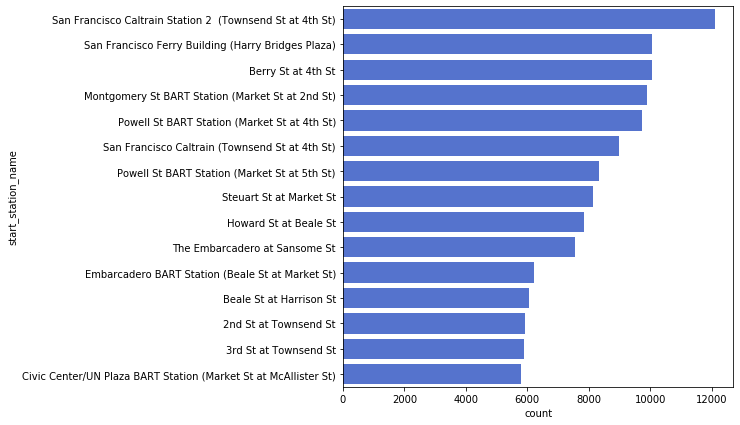

In [174]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Selecting the 15 start stations with more rents
popular_start_stations = df_2019['start_station_name'].value_counts().index[1:16]
# Creating countplot (using basecolor)
sns.countplot(data=df_2019, y='start_station_name', color='royalblue', order=popular_start_stations);

- we can see that Caltrain station located in San Francisco was by far the most popular station during the 2019 winter.
- the next 4 stations had almost the same riders.

Due to lack of information on station id and name in the winter of 2020, we cannot compare and see if there was any change in popularity of stations.

### End Station

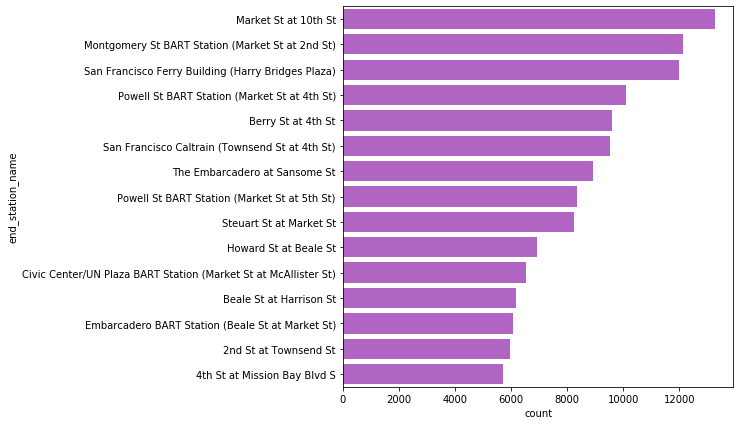

In [175]:
# Setting figure size
plt.figure(figsize=(7, 7))
# Selecting the 15 start stations with more rents
popular_end_stations = df_2019['end_station_name'].value_counts().index[1:16]
# Creating countplot (using basecolor)
sns.countplot(data=df_2019, y='end_station_name', color='mediumorchid', order=popular_end_stations);

- Market Street station at 10th street, out of blue, received more rider than any other station, with around 12,000 rider in three month.
- San Francisco Ferry Building is both a start and  an end popular destination for riders in San Francisco.

Due to lack of information on station id and name in the winter of 2020, we cannot compare and see if there was any change in popularity of stations.

### User Type

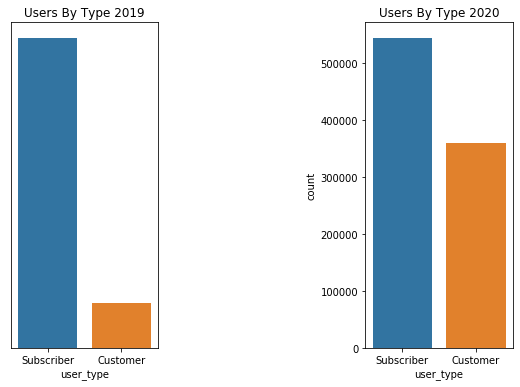

In [193]:
plt.figure(figsize=(9, 6))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'user_type' )
plt.title("Users By Type 2019")


plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'user_type', order = df_2020.user_type.value_counts().index );
plt.title("Users By Type 2020");

it seems that over the year 2019, the total number of sunscribers did not change at all, but the number of normal customers has risen considerbly, reaching from less than 100,000 riders in 2019 to around 360,000 riders in 2020.

### Comparison of each month 

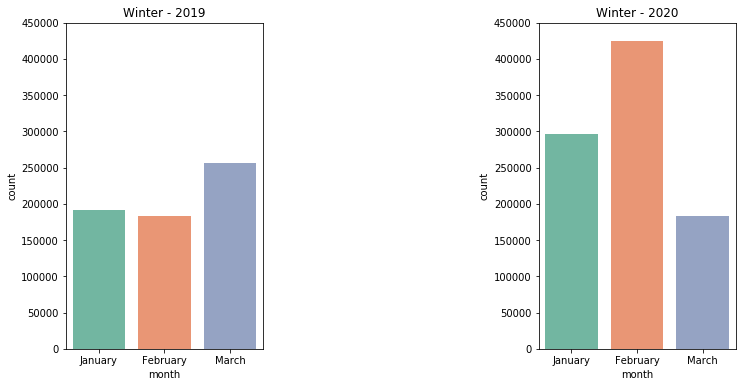

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'month',palette="Set2")
plt.title("Winter - 2019")
plt.ylim(0,450000)

plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'month' ,palette="Set2")
plt.ylim(0,450000)
plt.title("Winter - 2020");

- it is clear that in the first two months of the winter, people have rented bicycles more in 2020 than 2019.this figure has almost been doubled in February 2020, with around 420,000 rented bike, while in on the same month in 2019, less than 200,000 ride was happened.
- popularity of these bikes fell in march, from around 250k in 2019 to less than 200k in 2020. the reason might be related to the Corona Virus pandemic.

### Weekdays

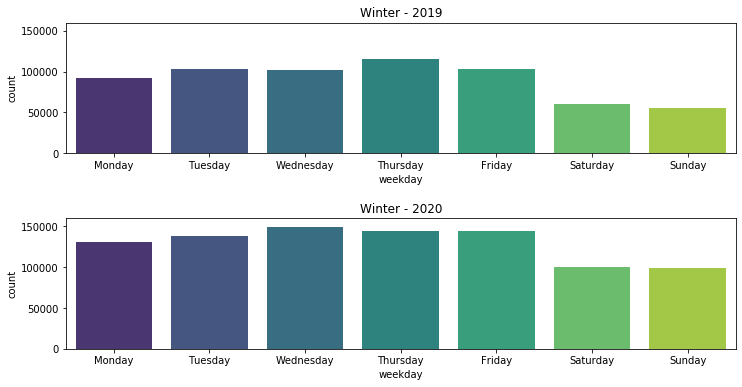

In [69]:
#df = pd.DataFrame()

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'weekday',palette="viridis", order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Winter - 2019")
plt.ylim(0,160000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'weekday' ,palette="viridis",  order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(0,160000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.5);

- As we can see, there is a peak during the middle days of the week. it seems that people are more into renting bike between Wednesday and Friday than any other days.
- there was a growth in overall bike renting on each day during the first three months of 2020,compared to the same period in 2019.

### Started Hour

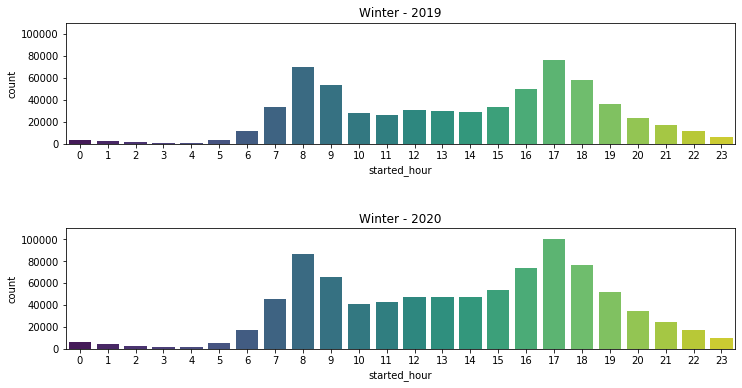

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'started_hour',palette="viridis")
plt.title("Winter - 2019")
plt.ylim(0,110000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'started_hour' ,palette="viridis")
plt.ylim(0,110000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.7);

- In both charts, 8 am and 5 pm are the most two popular time for renting bicycles.
- the main difference between these two chart is that more people have rented bikes between 8 and 17 o'clock (around 20,000)

### Ended Hour

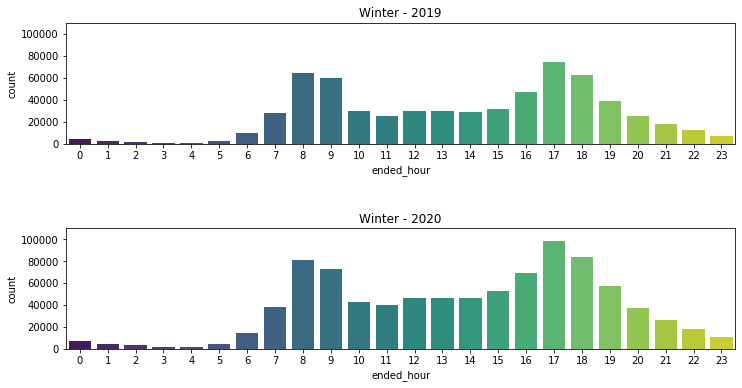

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'ended_hour',palette="viridis")
plt.title("Winter - 2019")
plt.ylim(0,110000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'ended_hour' ,palette="viridis")
plt.ylim(0,110000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.7);

- it seems that both started hour and ended our of the rent follow a similar pattern.

### Location

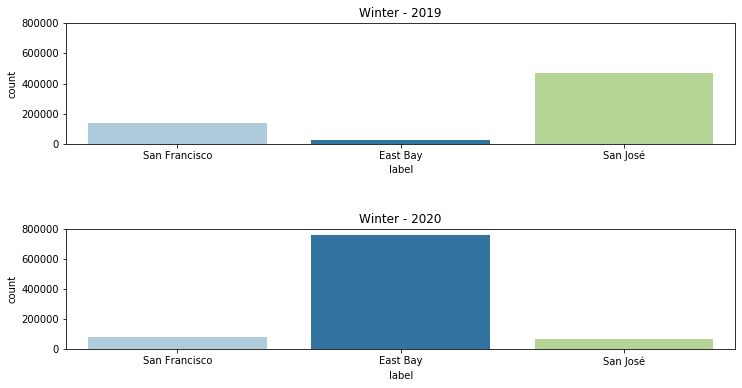

In [114]:

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'label',palette="Paired",order = ["San Francisco","East Bay","San José"])
plt.title("Winter - 2019")
plt.ylim(0,800000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'label' ,palette="Paired", order =["San Francisco","East Bay","San José"] )

plt.ylim(0,800000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.7);

- It's so interensting how the pattern of bike renting has changed just during a year. while residents of San Jose rented the most bicycle during the winter in 2019 (around 400k), this figure has fallen by more than 300k. something must have happened there !!
- Almost nobody used Lyft bike renting in East Bay, but suddenly after a year, this location led this company make a fortune by renting around 800k bike just over a 3 month period.
- San Francico residents have rented less bike in 2020 in comparison to the previous year.

### Duration in Second

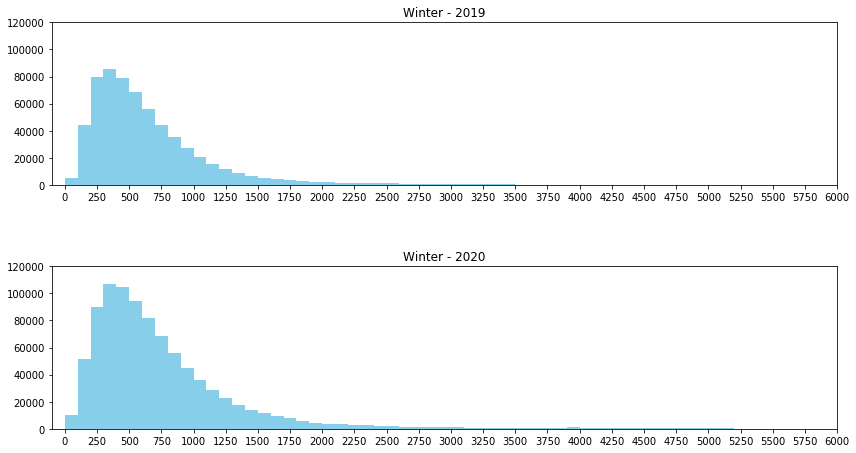

In [119]:
plt.figure(figsize=(12, 6))
#maybe a customer forgot to log off
plt.subplot(2,1,1)
bin_size = 100
bins = np.arange(0,df_2019.duration_sec.max()+bin_size,bin_size)
plt.hist(df_2019.duration_sec, bins = bins, color= "skyblue");
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000)
plt.ylim(0,120000)
plt.tight_layout()
plt.title("Winter - 2019")


plt.subplot(2,1,2)
bins = np.arange(0,df_2020.duration_sec.max()+bin_size,bin_size)
plt.hist(df_2020.duration_sec, bins = bins, color= "skyblue");
plt.xticks(ticks = [x for x in range(0,7000,250)])
plt.xlim(-100,6000)
plt.ylim(0,120000)
plt.title("Winter - 2020")
plt.subplots_adjust(hspace=0.5);

This graph is limited to 6000 seconds to exclude the 'outliers'. The main takeaway here is that the most trips have a duration between 250 and 550 seconds.

### Distance in Meter

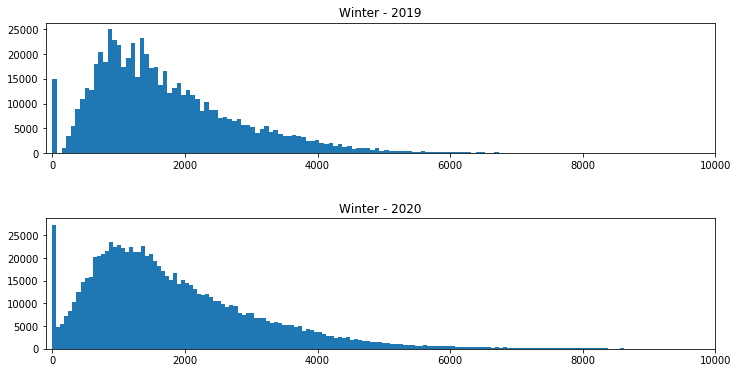

In [120]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.hist(data = df_2019, x= 'distance_in_m', bins = 1000)
plt.xlim(-100, 10000)
plt.title("Winter - 2019")

plt.subplot(2,1,2)
plt.hist(data = df_2020[df_2020['distance_in_m']< 69000], x= 'distance_in_m', bins = 1000)
plt.title("Winter - 2020")
plt.xlim(-100, 10000)
plt.subplots_adjust(hspace=0.5);

first of all, it seems that our geopy module in 2020 data did not work correctly as there are some distances more than 12000 kilometers which are absolutely wrong.so, we have eliminated them and consider a period like 2019 to compare them equally. the zero distance means that riders have came back to their start location to give away the bike.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Some conclusion could be made based on the above univariate explorations. first of all, more normal customers have rented bike in 2020 than the year before. In regards to months, it seems that there was a overall growth in popularity of bike renting in both January and February, but this figure failed to follow this pattern in March. i guess that global pandemic might be an issue. in both years, 8 am and 5 pm were the most popular time for renting. In 2019 San Jose residents rented the most but this title was earned by people who live in East Bay in 2020.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When i looked up the distance feature, i noticed that there are some mistakes as nobody can drive 12 thousand kilometer in 2 hours!! so, i eliminated those distances by filtering them out of my figure to reach a sensible answer.

## 2-3- Bivariate Exploration

In this section, relationships between pairs of variables in the data will be investigated, aiming to discover patterns or correlations.

### User Types in each month

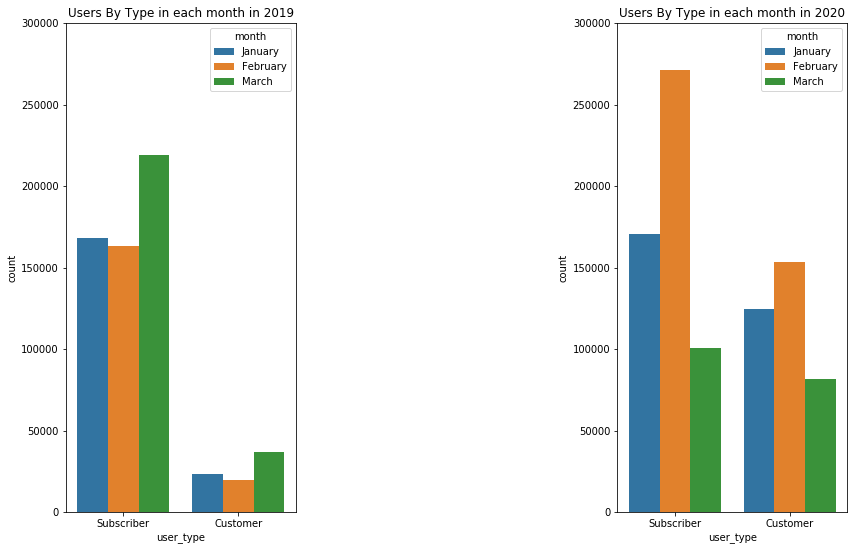

In [125]:
plt.figure(figsize=(14, 9))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'user_type' , hue = 'month')
plt.title("Users By Type in each month in 2019")
plt.ylim(0,300000)


plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'user_type', order = df_2020.user_type.value_counts().index , hue = 'month');
plt.title("Users By Type in each month in 2020")
plt.ylim(0,300000);

- In 2019, no matter which month you rent a bike, Subscribers were in majority. the number of normal customers were almost a third of subscribers in this year. However, people welcomed this system more in march.
- In 2020, situation differed. February was the most popular month among both subscribers and the total number of customers increased
- what is interesting about this chart is that in January and February 2020, people without subscription (customers) have rented more bike than subsvribers in March. the only time when the number of customers were more than subscribers.
- March 2020 was the time when the number of subscribers and customers were closest.

### User types in each area

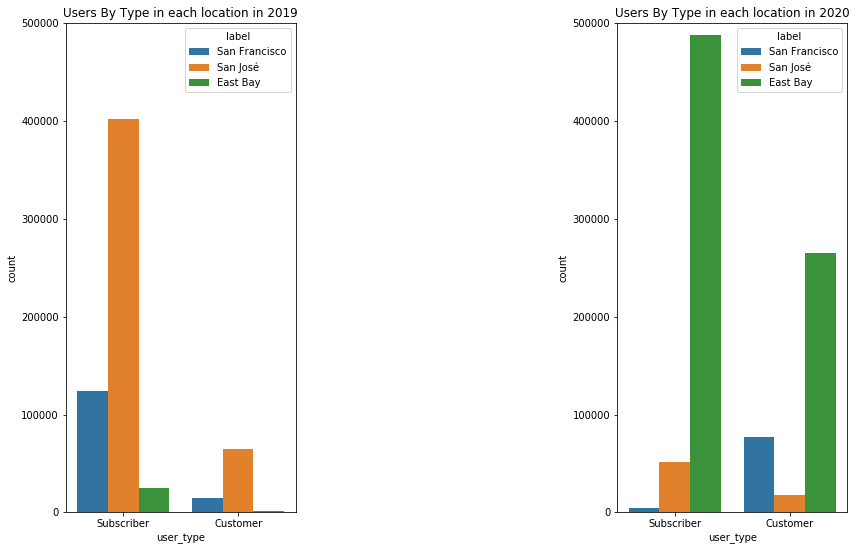

In [131]:
plt.figure(figsize=(14, 9))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'user_type' , hue = 'label')
plt.title("Users By Type in each location in 2019")
plt.ylim(0,500000)


plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'user_type', order = df_2020.user_type.value_counts().index , hue = 'label', hue_order = ['San Francisco', 'San José','East Bay']);
plt.title("Users By Type in each location in 2020")
plt.ylim(0,500000);

- In 2019, San Jose was by far the most popular place for rented bikes among both subscribers and customers throughout the winter. almost 400k times bikes were rented by subscribers just in this city, whereas this figure for San Francisco was around a quarter.
- In 2020, East Bay residents used more bike than any other city, even more than San Jose residents in winter of 2019, with around 500k and 300k rent for subscribers and customers respectively.
- Number of customers in winter in 2020 was larger than subscribers,which is interesting!

### Users By Type in each week day

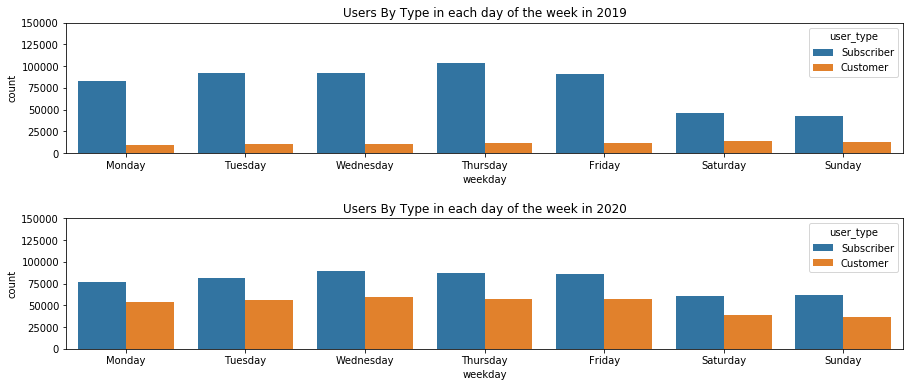

In [141]:
plt.figure(figsize=(15, 6))

plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'weekday' , order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue = 'user_type', hue_order =['Subscriber','Customer'] )
plt.title("Users By Type in each day of the week in 2019")
plt.ylim(0,150000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'weekday' , order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue = 'user_type', hue_order =['Subscriber','Customer'] )
plt.title("Users By Type in each day of the week in 2020")
plt.ylim(0,150000)
plt.subplots_adjust(hspace=0.5);

- It can be seen that the main difference between two bar chart is that the total number of customers have increased throughout the week in 2020.
- More subscribers can be seen on the weekends than the same time in 2019

### Distance Taken based on User Type

''

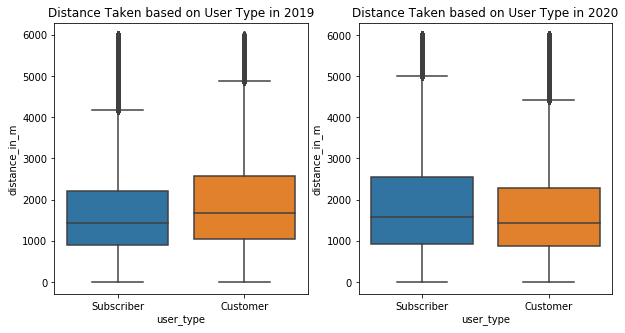

In [191]:

# Setting figure size
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
# Plotting boxplot
sns.boxplot(data=df_2019[df_2019['distance_in_m']<6000], x='user_type', y='distance_in_m')
plt.title("Distance Taken based on User Type in 2019")

plt.subplot(1,2,2)
# Plotting boxplot
sns.boxplot(data=df_2020[df_2020['distance_in_m']<6000], x='user_type', y='distance_in_m', order = ['Subscriber', 'Customer'])
plt.title("Distance Taken based on User Type in 2020")
;

It seems that customers take a longer journey with their rented bikes than subscribers in 2019. But the figures have changed in 2020. in winter of 2020, Subscribers took a longer trip on average than Customers, but not too much.

### trip time in second based on User Type

''

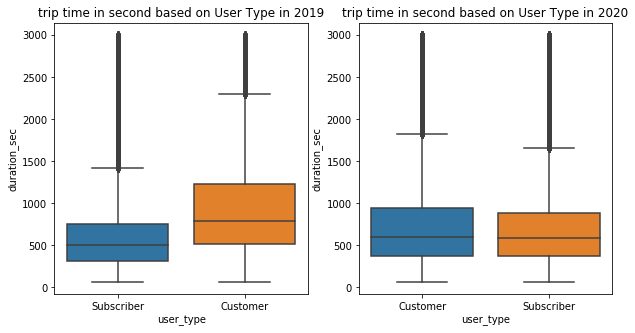

In [190]:
# Setting figure size
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
# Plotting boxplot
sns.boxplot(data=df_2019[df_2019['duration_sec']<3000], x='user_type', y='duration_sec')
plt.title("trip time in second based on User Type in 2019")

plt.subplot(1,2,2)
# Plotting boxplot
sns.boxplot(data=df_2020[df_2020['duration_sec']<3000], x='user_type', y='duration_sec')
plt.title("trip time in second based on User Type in 2020")
;

- it seems that in 2019, Customers have taken a longer time ride with their bikes than Subscribers. each Customer rented a bike on average around 800 seconds (13 minutes), but this figure is around 500 seconds(8 minutes) for subscribers.
- maybe the policy have changed but in 2020 the average time between Customers and subscribers were almost similar. it means that something have changed during this year.

### Three locations, Three months

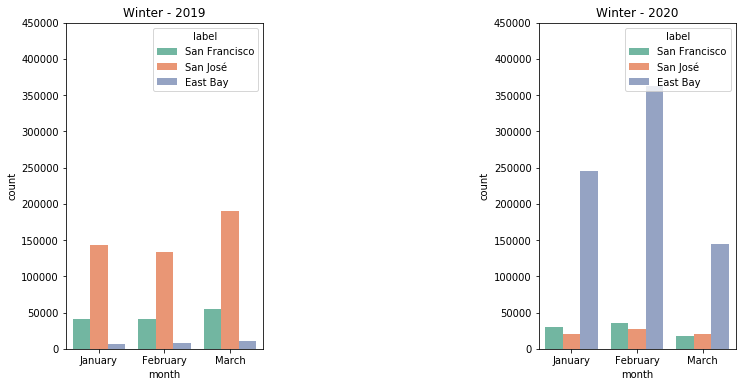

In [150]:
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)
sns.countplot(data= df_2019, x= 'month',palette="Set2", hue = 'label', hue_order = ['San Francisco', 'San José','East Bay'])
plt.title("Winter - 2019")
plt.ylim(0,450000)

plt.subplot(1,3,3)
sns.countplot(data= df_2020, x= 'month' ,palette="Set2", hue = 'label', hue_order = ['San Francisco', 'San José','East Bay'])
plt.ylim(0,450000)
plt.title("Winter - 2020");

- In 2019, residents of San Jose were using rented bikes more than two other locations. while there was a gradual rise in total number of users in San Francisco, East Bay figure remained relatively unchanged over the three month period.
- While East Bay was third in 2019, they have beaten other users in other places by renting far more bike in 2020. Just 400k bike was rented in February, which is somehow a record!!. this figure has fallen by half in March (probably due to global pandemic) 

### Average duration time based on each month

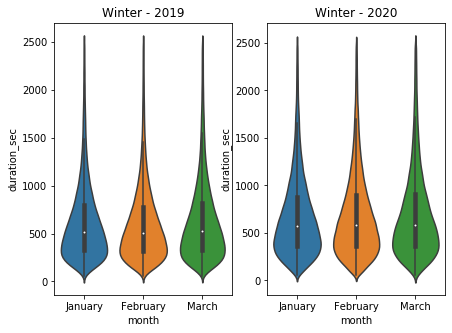

In [7]:

# Setting figure size
plt.figure(figsize=(7, 5))

plt.subplot(1,2,1)
# Plotting boxplot
sns.violinplot(data=df_2019[df_2019['duration_sec']<2500], x='month', y='duration_sec')
plt.title("Winter - 2019")

plt.subplot(1,2,2)
sns.violinplot(data=df_2020[df_2020['duration_sec']<2500], x='month', y='duration_sec')
plt.title("Winter - 2020")

plt.subplots_adjust(hspace=0.5);

It seems that there is no difference in duration time among three months in each year. 2020 followed a similar pattern. average duration time a bike rented in both years appear to be similar and is around 600 seconds (10 minutes).

### Average distance taken based on each month

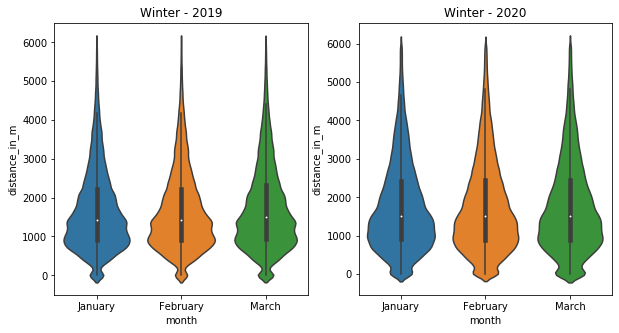

In [8]:
# Setting figure size
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
# Plotting boxplot
sns.violinplot(data=df_2019[df_2019['distance_in_m']<6000], x='month', y='distance_in_m')
plt.title("Winter - 2019")

plt.subplot(1,2,2)
sns.violinplot(data=df_2020[df_2020['distance_in_m']<6000], x='month', y='distance_in_m')
plt.title("Winter - 2020")

plt.subplots_adjust(hspace=0.5);

like duration time, distance taken by each bike rider in each month is similar to each other, with around 1600 meters by each rider. the same pattern can be seen in 2020, when each rider, on average, took a distance of about 1800 meters, no matter which month.

### Weekday in each location

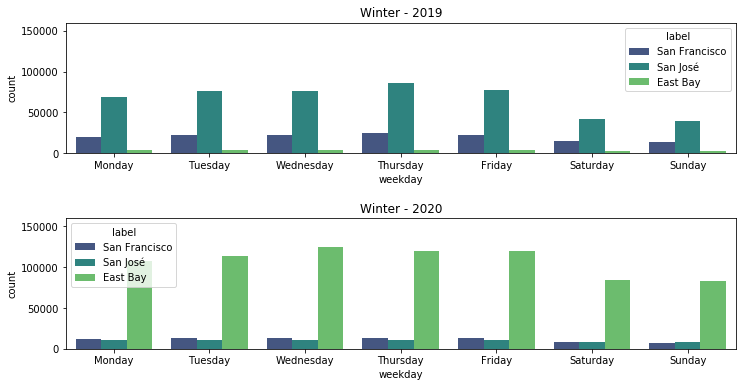

In [156]:

plt.figure(figsize=(12, 6))

plt.subplot(2,1,1)
sns.countplot(data= df_2019, x= 'weekday',palette="viridis", order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue = 'label', hue_order = ['San Francisco', 'San José','East Bay'])
plt.title("Winter - 2019")
plt.ylim(0,160000)

plt.subplot(2,1,2)
sns.countplot(data= df_2020, x= 'weekday' ,palette="viridis",  order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], hue = 'label', hue_order = ['San Francisco', 'San José','East Bay'])
plt.ylim(0,160000)
plt.title("Winter - 2020");
plt.subplots_adjust(hspace=0.5);

As we could predict, San Jose dwellers rented more bike on each day of the week than any other places, and this figure have reached to its peak on Thursdays, with around 100k rented bikes. 2020 was different. East Bay have beaten other two residence area and attracted more riders than them. the average is higher than 100k.

### trip duration average on each weekday

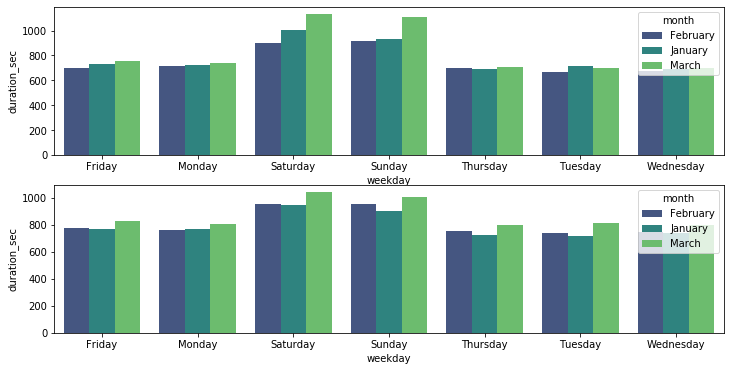

In [172]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)

sns.barplot(x = "weekday", y = "duration_sec", data = df_2019.groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")

plt.subplot(2,1,2)

sns.barplot(x = "weekday", y = "duration_sec", data = df_2020.groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")

plt.subplots_adjust(hspace=0.5);

We have seen that people tend to rent more bike on working days than weekends. However, what is interesting about this figure is that average duration time each bike was rented was higher in weekends than working days. It is possible that bikes rented from Monday to Thursday are for commuting to work or maybe other goal oriented tasks, but during the weekends, there are other goals. Now let's look at average distance taken on each week day.

### average distance taken on each week day

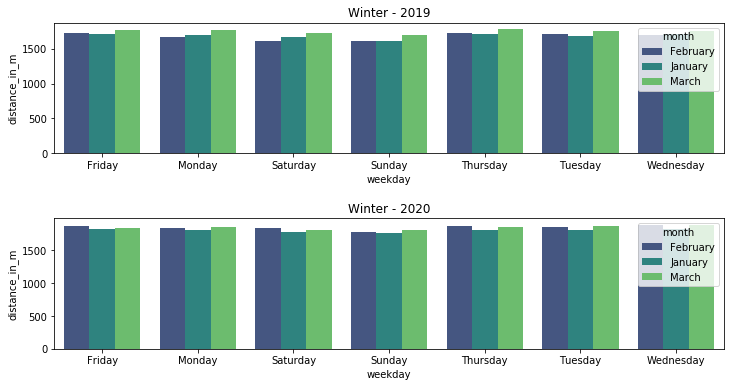

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)

sns.barplot(x = "weekday", y = "distance_in_m", data = df_2019.groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")
plt.title("Winter - 2019")

plt.subplot(2,1,2)
sns.barplot(x = "weekday", y = "distance_in_m", data = df_2020[df_2020['distance_in_m']<69000].groupby(["weekday", "month"], as_index = False).mean(), palette = "viridis", hue = "month")
plt.title("Winter - 2020")

plt.subplots_adjust(hspace=0.5);

there is no difference on average distance taken between stations on each day and each biker have taken a 1.5 km journey on each day.

### Average duration time on each hour based on month 

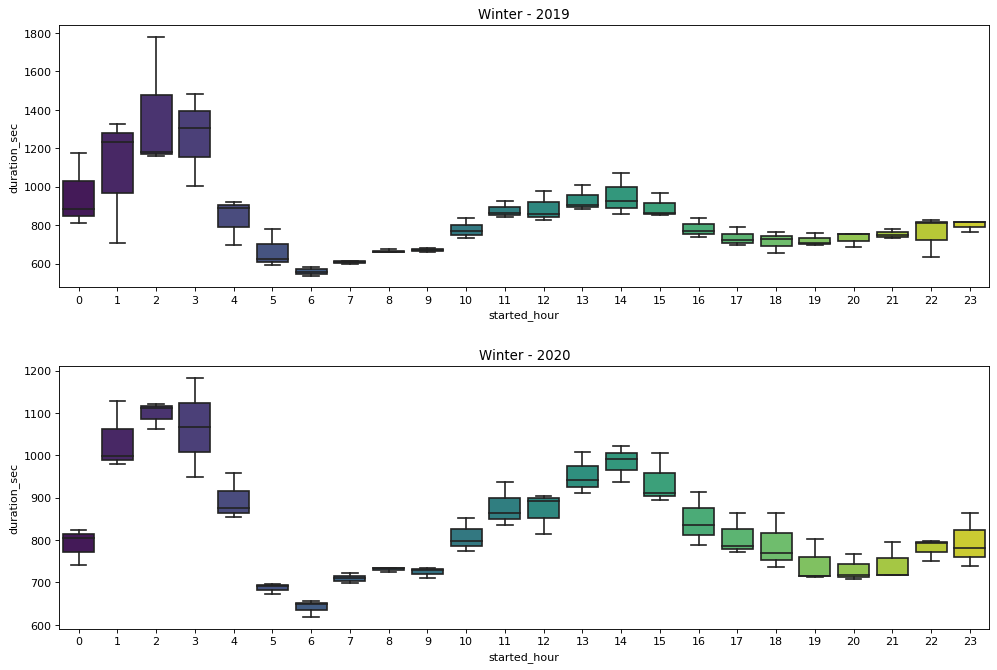

In [12]:

fig, ax = plt.subplots(figsize = (15,10), dpi = 80)
plt.subplot(2,1,1)
sns.boxplot(x = "started_hour", y = "duration_sec", data = df_2019.groupby(["started_hour", "month"], as_index = False).mean(), palette = "viridis")
plt.title("Winter - 2019")

plt.subplot(2,1,2)
sns.boxplot(x = "started_hour", y = "duration_sec", data = df_2020.groupby(["started_hour", "month"], as_index = False).mean(), palette = "viridis")
plt.title("Winter - 2020")

plt.subplots_adjust(hspace=0.3);

during some odd times,such as 2 am or 2 pm, people have rented a longer time on average than any other time. it is somehow weird and require in depth analysis.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In 2019, no matter which month you rent a bike, Subscribers were in majority. the number of normal customers were almost a third of subscribers in this year. However, people welcomed this system more in march.another point is that It seems customers take a longer journey with their rented bikes than subscribers in 2019. But the figures have changed in 2020. in winter of 2020, Subscribers took a longer trip on average than Customers, but not too much.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Firstly, In 2019, residents of San Jose were using rented bikes more than two other locations. while there was a gradual rise in total number of users in San Francisco, East Bay figure remained relatively unchanged over the three month period. Secondly, We have seen that people tend to rent more bike on working days than weekends. However, what is interesting about this figure is that average duration time each bike was rented was higher in weekends than working days. It is possible that bikes rented from Monday to Thursday are for commuting to work or maybe other goal oriented tasks, but during the weekends, there are other goals. Now let's look at average distance taken on each week day.

## 2-4- Multivariate Exploration

In the Multivariate Exploration section I'll be creating plots of three or more variables to investigate the data even further.

### User Type - Month - Weekday

''

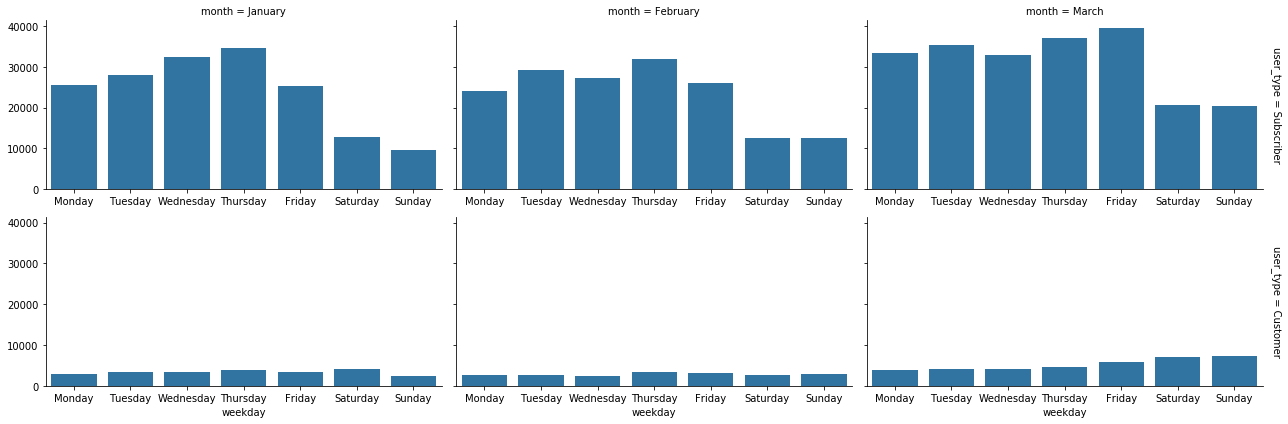

In [246]:
# Creating facetgrid for 2019
g = sns.FacetGrid(data=df_2019, col='month', row='user_type', row_order =  ['Subscriber','Customer'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
;

''

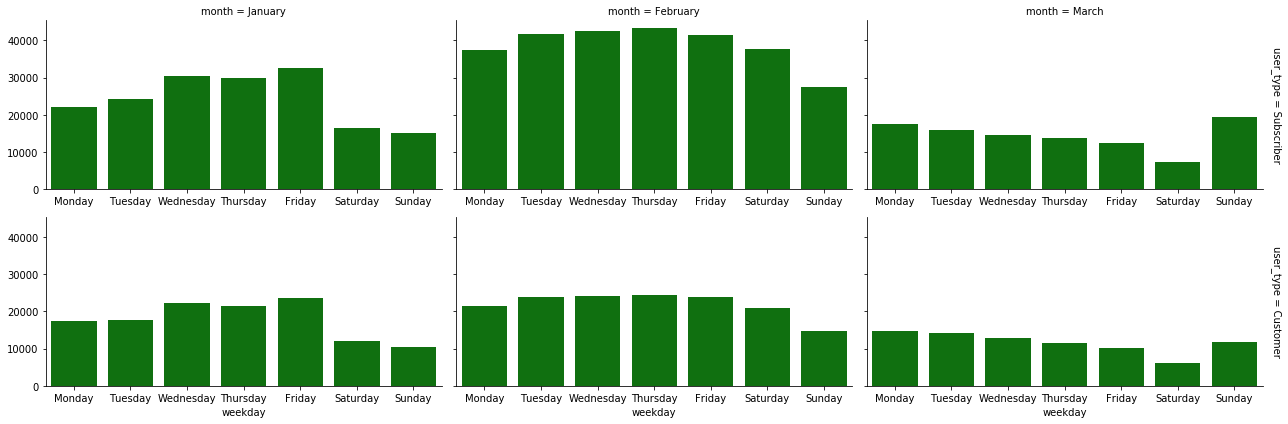

In [247]:
# Creating facetgrid for 2020
g = sns.FacetGrid(data=df_2020, col='month', row='user_type', row_order =  ['Subscriber','Customer'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color = 'g')
;

- As we expected, popularity of rented bikes during the week was higher in 2019 than the weekends for Subscribers, but there was no difference in diversity of customers throughout the week.
- in 2020, subscribers in January and February followed a similar pattern, but in March 2020, total number of people who rented bikes on Sunday were more than any  other days among Subscribers. what is interesting here is that customers also followed the same pattern. maybe there was an offer on Sundays in March 2020.
- what is more, total number of customers saw a sudden rise in 2020, reaching to 20000 to 30000 rent per day.

### Weekday - Month - Start time

C:\Users\Sahand\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


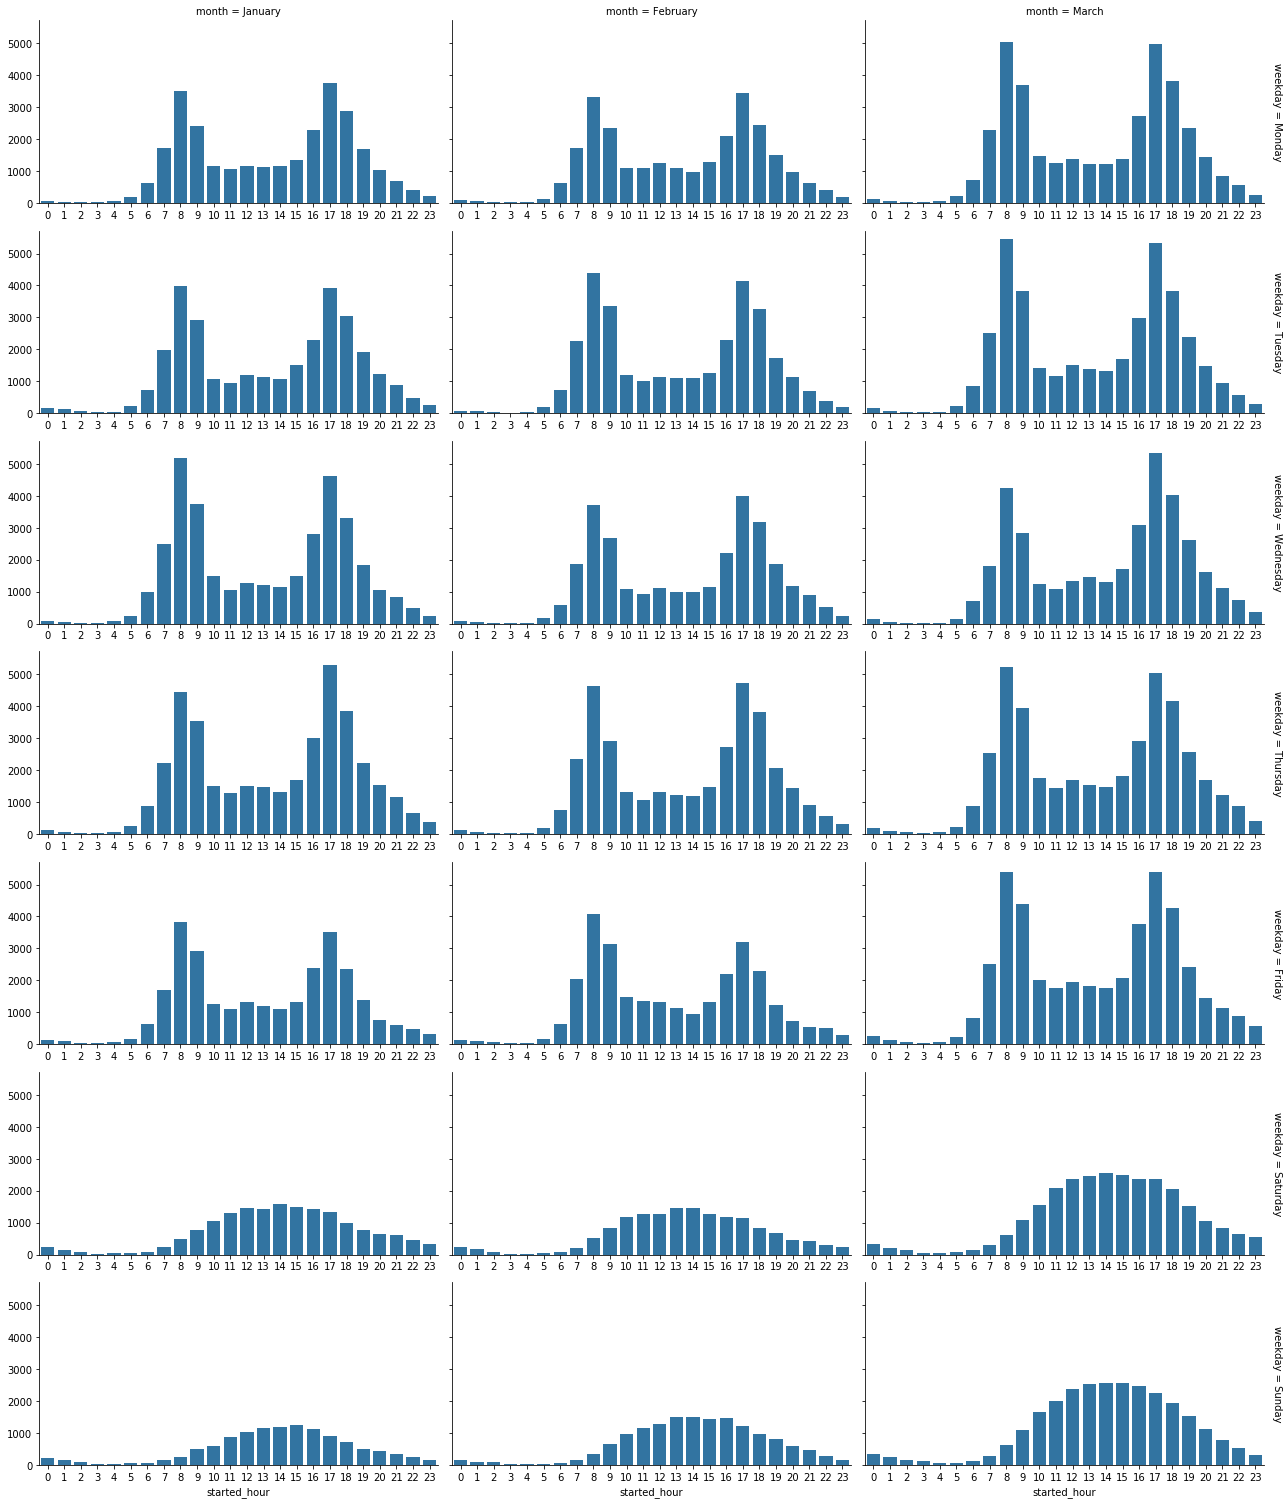

In [244]:
# Creating facetgrid for 2019
g = sns.FacetGrid(data=df_2019, col='month', row='weekday', row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'started_hour');

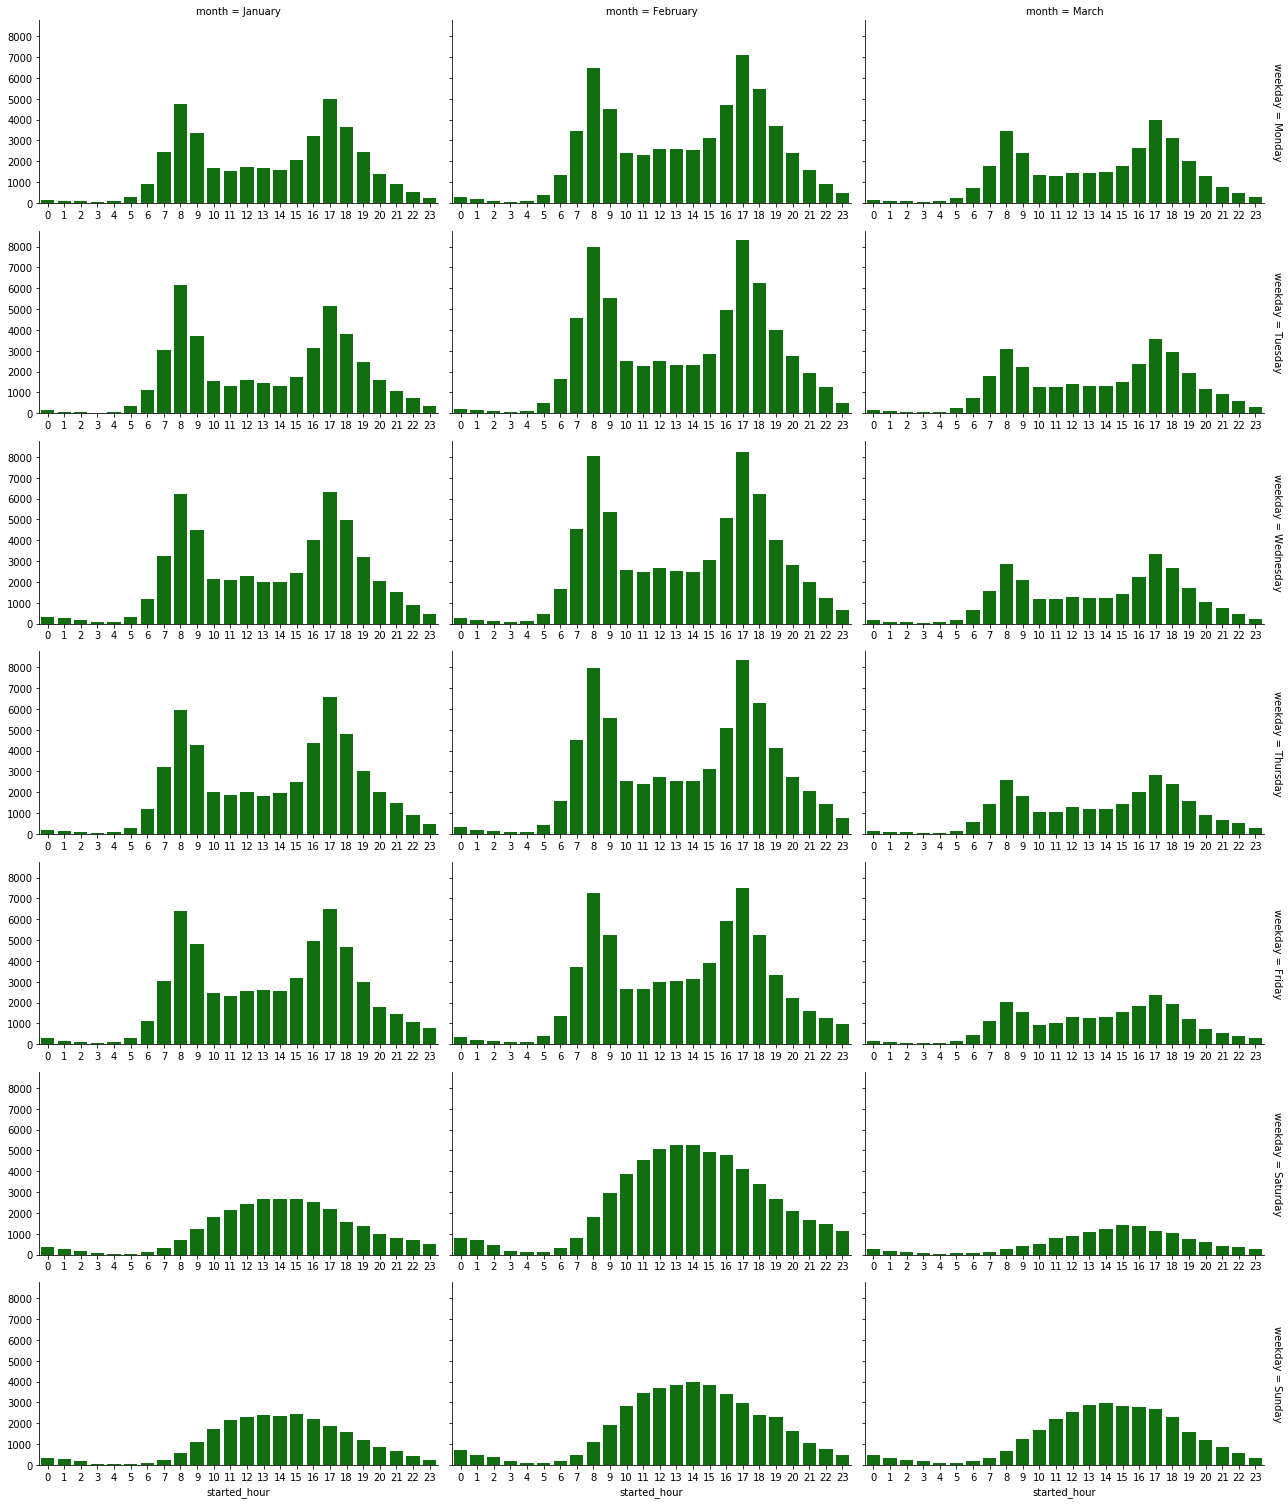

In [245]:
# Creating facetgrid for 2020
g = sns.FacetGrid(data=df_2020, col='month', row='weekday', row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'started_hour', color = 'g');

- a similar pattern has been repeated from Monday to Friday in each month in both years. people tend to rent bike mostly in 8 am and 17 pm, without any exception. However, the pattern during the weekends are completely different. on Saturday and Sunday, the popular hours for renting is between 11 am and 16 pm, which is the opposite of other days.
- less people on average have rented bikes in march than two other months in 2020.

### Weekday - Month - User type based on duration time

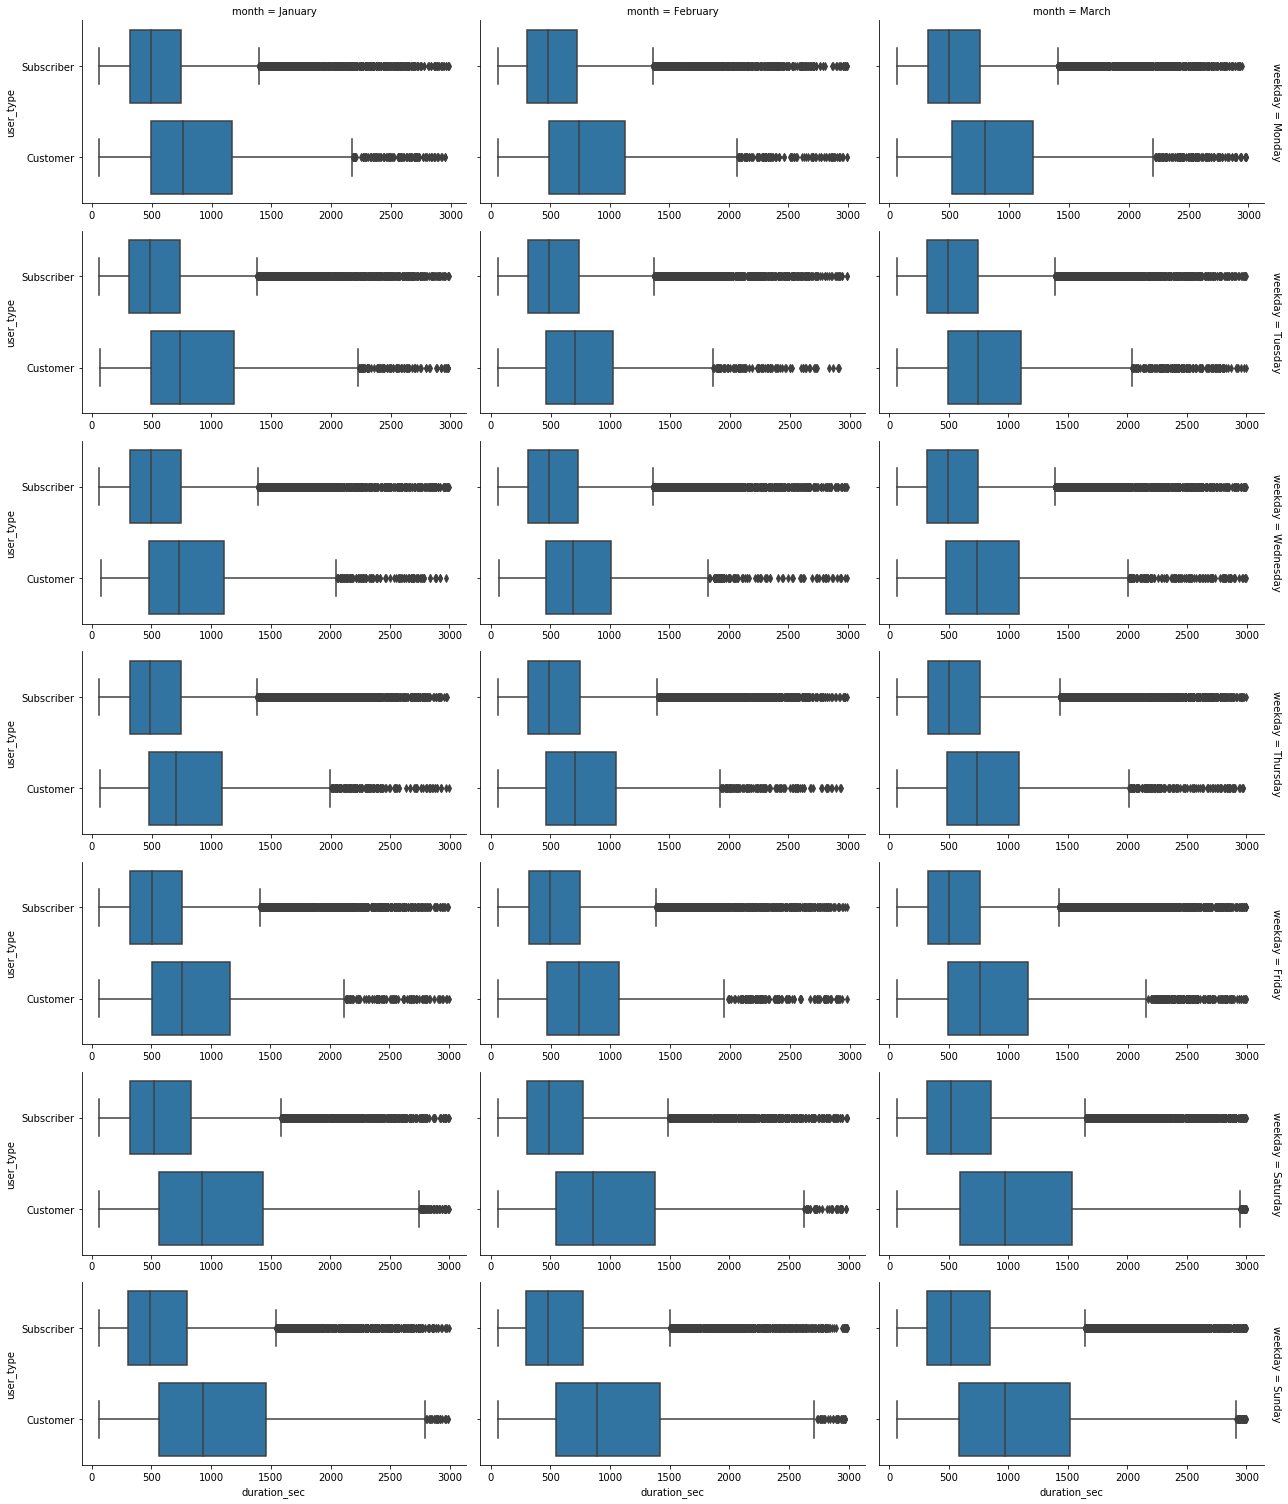

In [249]:
# Creating facetgrid for 2019
g = sns.FacetGrid(data=df_2019[df_2019['duration_sec']<3000] , col='month', row='weekday', row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.boxplot, 'duration_sec', 'user_type', order = ['Subscriber', 'Customer']);

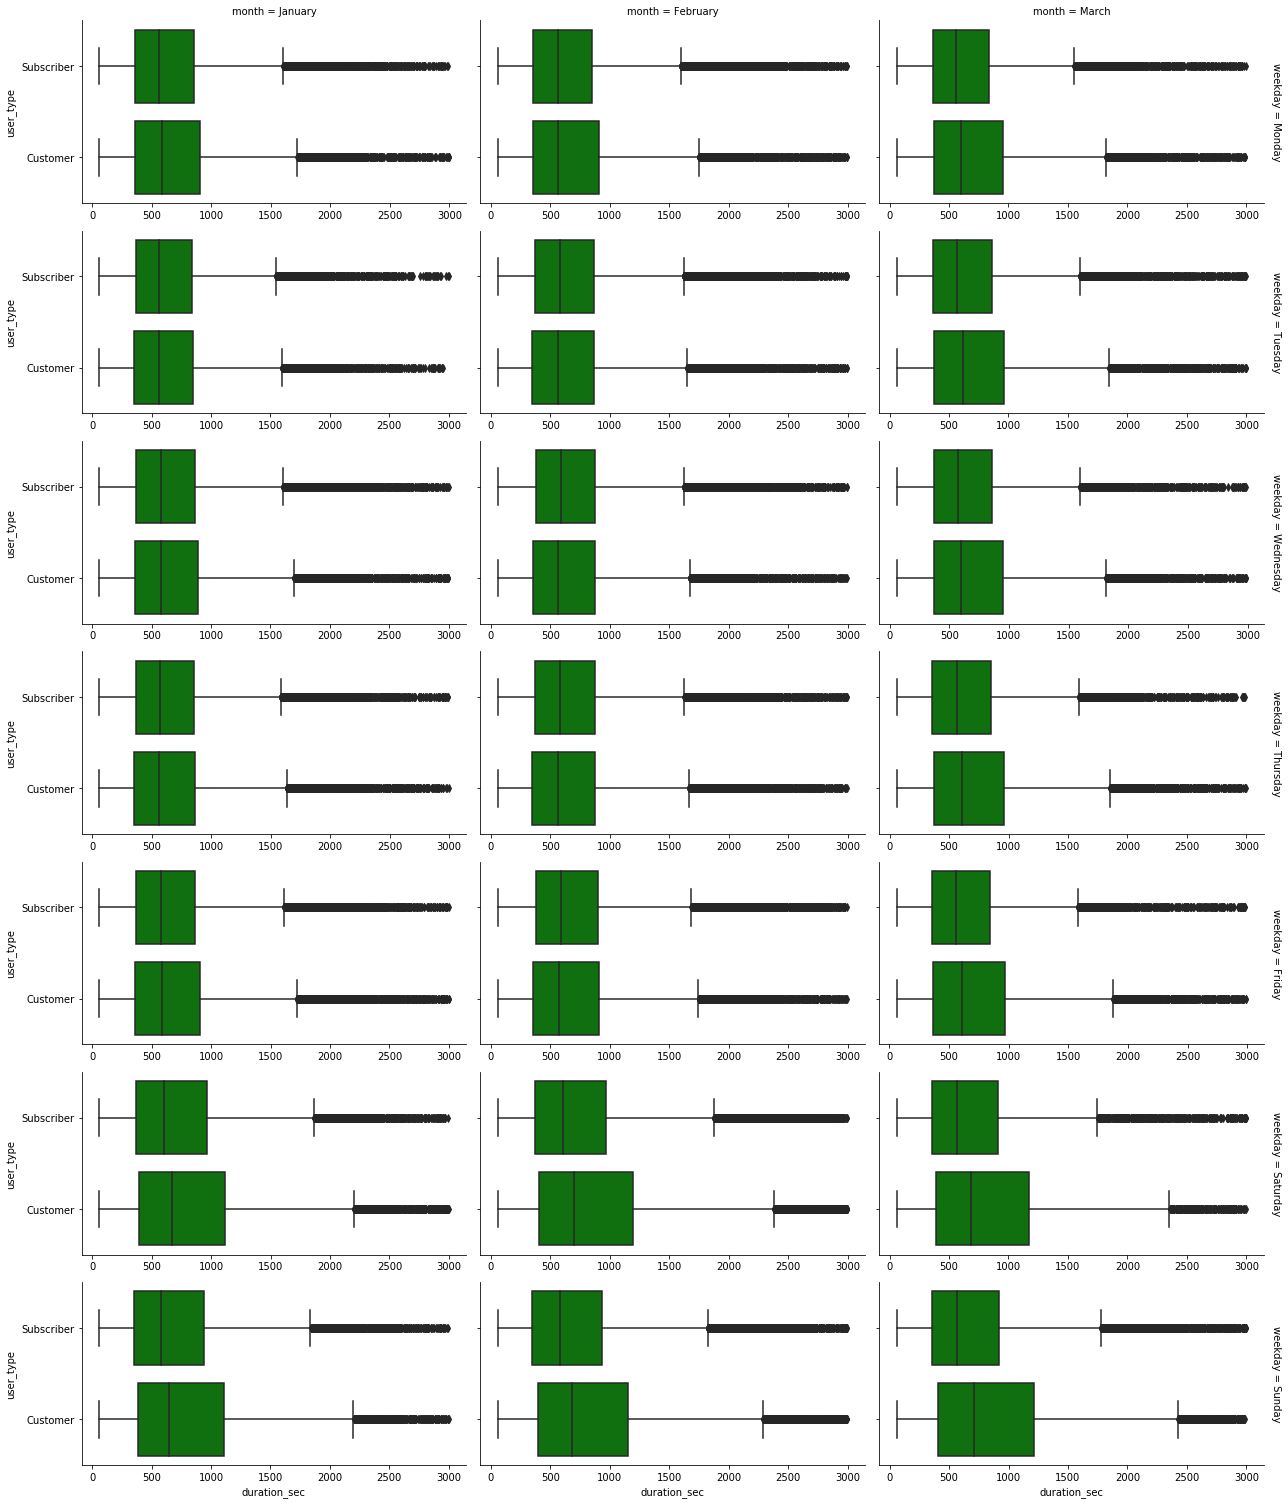

In [250]:
# Creating facetgrid for 2020
g = sns.FacetGrid(data=df_2020[df_2020['duration_sec']<3000] , col='month', row='weekday', row_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.boxplot, 'duration_sec', 'user_type',color = 'g',order = ['Subscriber', 'Customer']);

It is interesting that no matter which day of the week, or which month of the year, average trip time among customers were higher in 2019 than Subscribers. there is not even a day on average when Subscribers could surpass Customers. However, in 2020, there was a tough competition between them. During the working days, there was almost no differences between them, and just on weekends, we could see a minor superiority.

### User type - location - Weekday

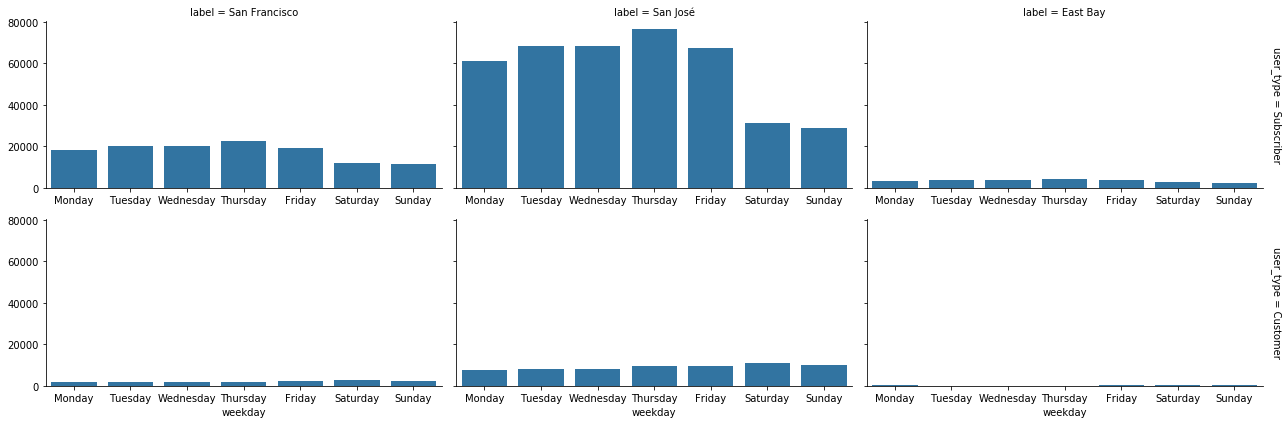

In [229]:
# Creating facetgrid for 2019
g = sns.FacetGrid(data=df_2019, col='label', row='user_type', 
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

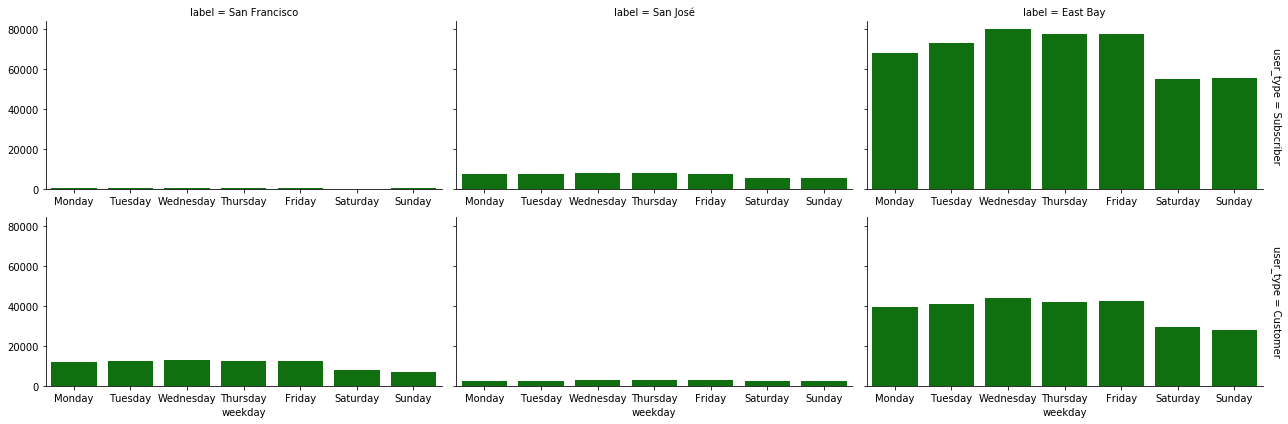

In [240]:
# Creating facetgrid for 2020
g = sns.FacetGrid(data=df_2020, col='label', row='user_type', col_order=['San Francisco', 'San José','East Bay'], row_order = ['Subscriber','Customer'],
                  height=3, aspect=2, margin_titles=True, sharex=False)
# Displaying countplots
g.map(sns.countplot, 'weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],color = 'g');

- In 2019, San Jose Susbcribers have rented more than any other resident areas. almost no customer rented a bike in East bay.
- total number of Customers have increased in 2020, and customers in East Bay have rented more than any other customer and subscriber in San Francisco and San Jose.it seems that renting bike have become a daily routine of East bay residents and people in San Jose are now reluctant to this type of activity

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There was not any direct relationship because we mostly checked categorical variables and there was a diversity in tables. but what was interesting is that while total number of bikes rented as subscribers where higher in both years, average trip time by each bike was higher among customers!! we could also see a different pattern of renting bike during the weekends than working days, as more people in the beginning of the week rent the bike just in 8 am and 17 pm, but in the weekends it is between 11 am to 16 pm.
### Were there any interesting or surprising interactions between features?

> as i said above,  while total number of bikes rented as subscribers where higher in both years, average trip time by each bike was higher among customers!!